# Patterns of Protection : Data Understanding and Classfication in Cyber Security

Load All the cloumn Name

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with the actual path to your CSV file
file_path = '/content/Global_Cybersecurity_Threats_2015-2024.csv'

# Load the CSV file
try:
    df = pd.read_csv(file_path)

    # Display all column names
    print("All Column Names:")
    print(df.columns.tolist())

except Exception as e:
    print(f"Error loading file: {e}")


All Column Names:
['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']


##Loading Shape of Data set with  sample data, missing Values, Data type and the Unique values in key columns

With the help of loading cloumn and Shape of Data set with sample data, missing Values, Data type and the Unique values in key columns we can understand GLobal Cyber security data and see few data cloumn which it help us to understand it

In [ ]:
# Basic overview
print("Shape of dataset:", df.shape)
print("\nSample data:\n", df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)

# Unique values in key columns
for col in ['Attack Types', 'severity', 'target_system', 'region']:
    if col in df.columns:
        print(f"\nUnique values in '{col}':", df[col].unique())



Shape of dataset: (3000, 10)

Sample data:
    Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software   

With help of Descriptive Statistics and above data we can eaisly analysis following area
*   Summary of numerical columns
*   Frequency of Attack types
*   Attack over time


Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64


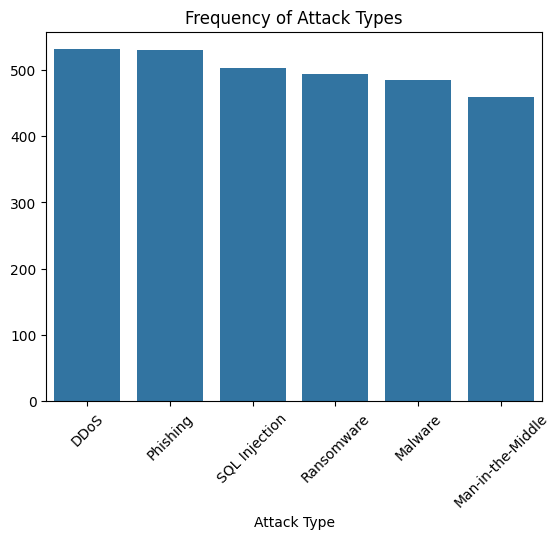

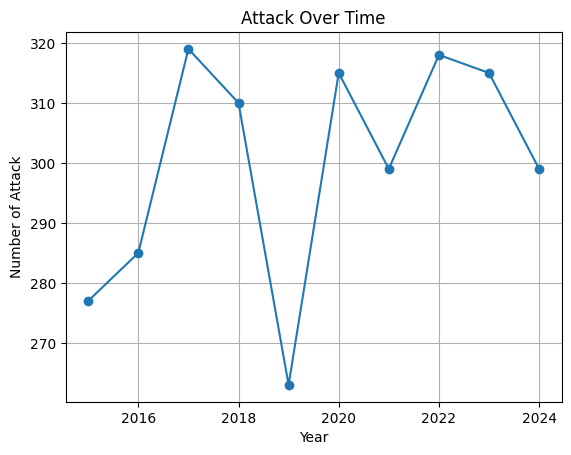

------------------------------------------------------------------
Conclude That.
1. As per above Frequency of Attack Types Bar chart, Its clearly showing that DDOS and Phishing is dominate in different attacks type
2. As per above Attack over the time, frequecy is increasing


In [ ]:
# Frequency of Attack types
threat_freq = df['Attack Type'].value_counts()
print(threat_freq)

# Threats over time
yearly_trend = df.groupby('Year').size()

# Visualization
sns.barplot(x=threat_freq.index, y=threat_freq.values)
plt.title('Frequency of Attack Types')
plt.xticks(rotation=45)
plt.show()

yearly_trend.plot(kind='line', marker='o', title='Attack Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attack')
plt.grid(True)
plt.show()

print("------------------------------------------------------------------")
print("Conclude That.")
print("1. As per above Frequency of Attack Types Bar chart, Its clearly showing that DDOS and Phishing is dominate in different attacks type")
print("2. As per above Attack over the time, frequecy is increasing")

Affected User Data analysis

Total users affected globally (2015–2024): 1,514,052,409
------------------------------------------------------------------
Users affected per year:
Year
2015    141293170
2016    144034584
2017    161807880
2018    151774954
2019    130212928
2020    159036761
2021    155241999
2022    163263160
2023    154305656
2024    153081317
Name: Number of Affected Users, dtype: int64
------------------------------------------------------------------
Users affected by Country:
Country
Brazil       168806980
UK           157464983
France       156229142
Russia       152191835
Australia    150011830
India        149178659
Japan        148711814
Germany      147675358
USA          144200870
China        139580938
Name: Number of Affected Users, dtype: int64
------------------------------------------------------------------


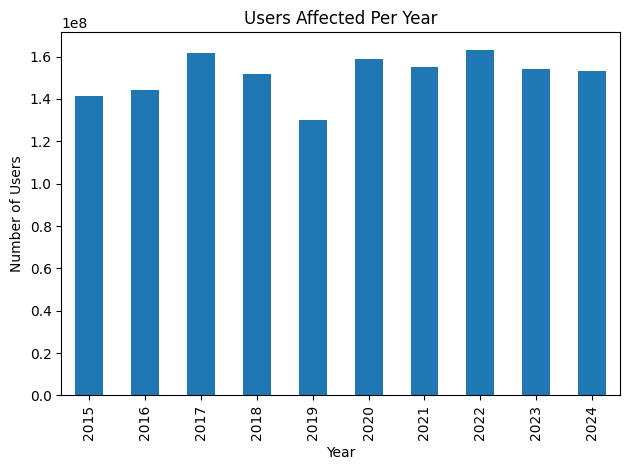

In [ ]:
# Convert Number of Affected Users to numeric (if needed)
df['Number of Affected Users'] = pd.to_numeric(df['Number of Affected Users'], errors='coerce')

# Drop rows with missing or invalid user counts
df_clean = df.dropna(subset=['Number of Affected Users'])

total_users = df_clean['Number of Affected Users'].sum()
print(f"Total users affected globally (2015–2024): {int(total_users):,}")
print("------------------------------------------------------------------")

# Group by year and sum users affected
yearly_users = df_clean.groupby('Year')['Number of Affected Users'].sum()

# Display results
print("Users affected per year:")
print(yearly_users)
print("------------------------------------------------------------------")

# Group by Country
regional_users = df_clean.groupby('Country')['Number of Affected Users'].sum().sort_values(ascending=False)

# Display results
print("Users affected by Country:")
print(regional_users)
print("------------------------------------------------------------------")

import matplotlib.pyplot as plt

# Plot yearly impact
yearly_users.plot(kind='bar', title='Users Affected Per Year')
plt.ylabel('Number of Users')
plt.xlabel('Year')
plt.tight_layout()
plt.show()




Above affected user data showing every year huge nymber of user are affecting with Cyber security threat based on data study between 2015 to 2024

Lets check see how much Financial Loss  every year for each country

   Year    Country  Financial Loss (in Million $)
0  2015  Australia                        1083.64
1  2015     Brazil                        1433.53
2  2015      China                        1230.41
3  2015     France                        1678.81
4  2015    Germany                        1245.14
------------------------------------------------------------------
Country  Australia   Brazil    China   France  Germany    India    Japan  \
Year                                                                       
2015       1083.64  1433.53  1230.41  1678.81  1245.14  1588.71  1346.21   
2016       1823.38  1507.33  1890.11  1126.03  1752.33   739.05   626.25   
2017       1472.65  1711.90  1146.21  1891.72  1974.10  1701.02  1847.73   
2018       1483.63  1533.38  1054.21  1251.98  1815.61  1918.73  1331.31   
2019       1090.43  1183.03  1258.51  1343.36  1350.34  1254.71  1215.37   

Country   Russia       UK      USA  
Year                                
2015     1608.85  1729.62 

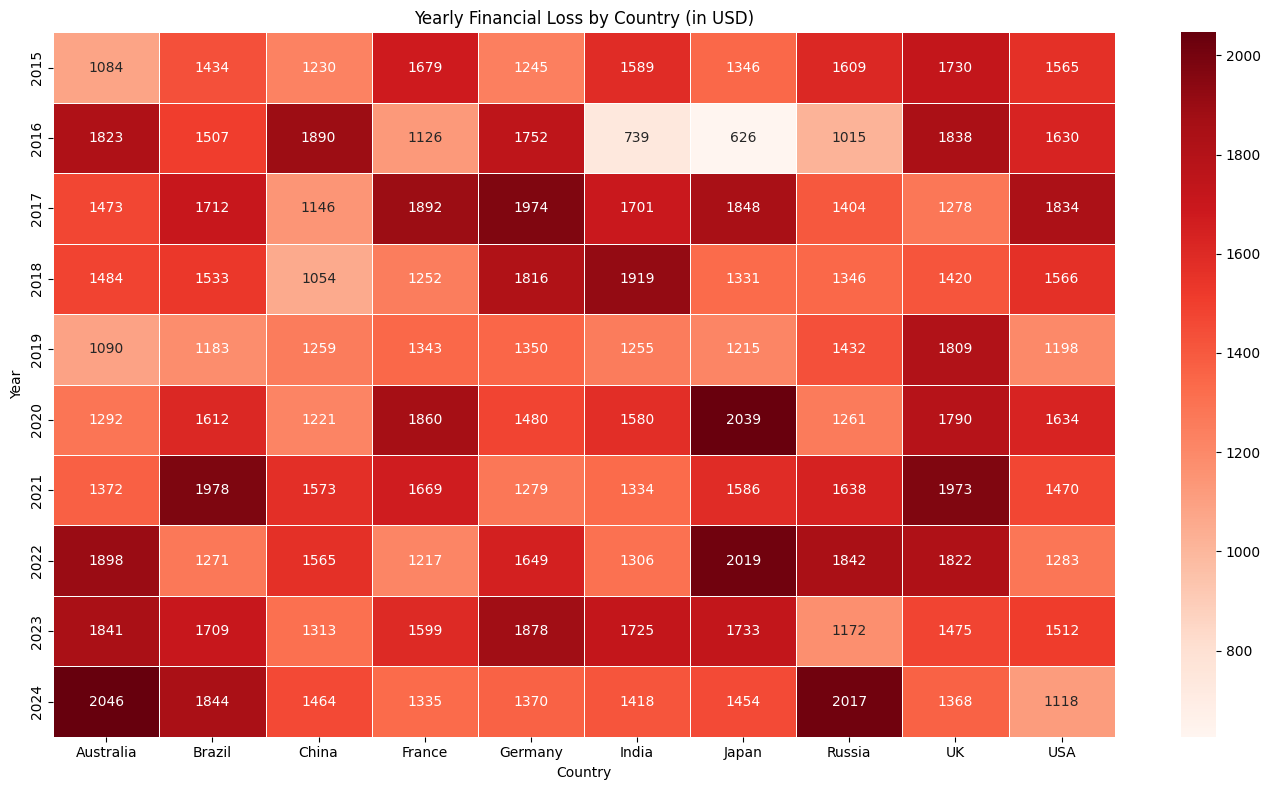

------------------------------------------------------------------


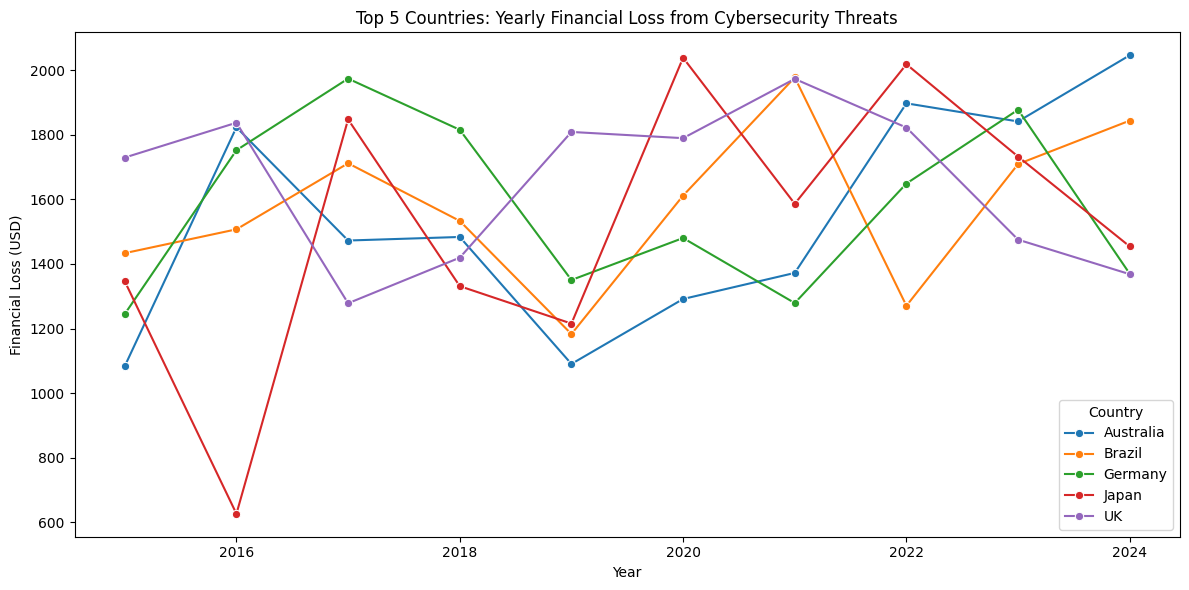

------------------------------------------------------------------


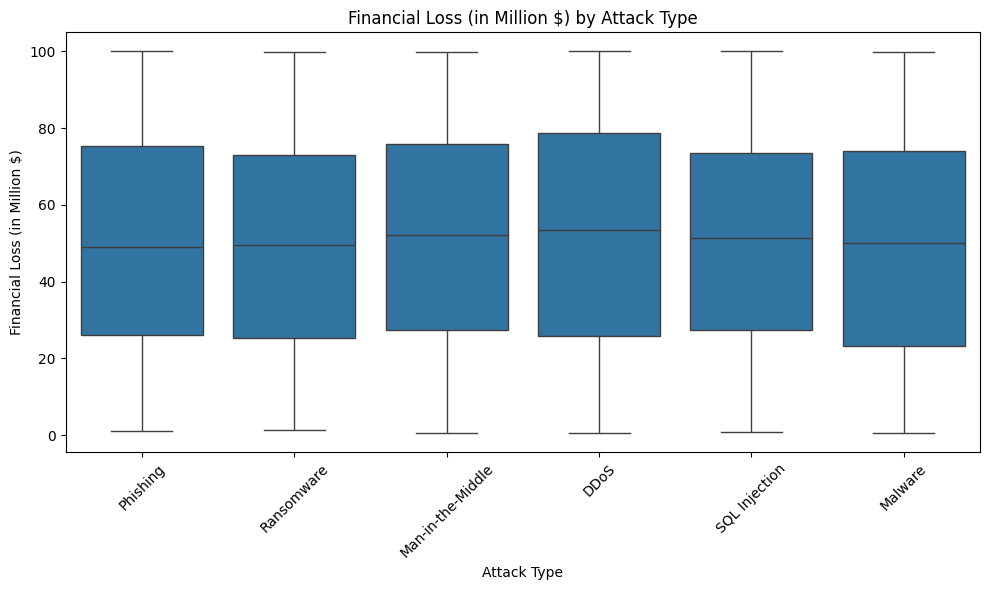

In [ ]:
# Ensure 'Financial_Loss' is numeric
df['Financial Loss (in Million $)'] = pd.to_numeric(df['Financial Loss (in Million $)'], errors='coerce')

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['Year', 'Country', 'Financial Loss (in Million $)'])

# Convert 'Year' to integer if needed
df_clean['Year'] = df_clean['Year'].astype(int)

# Group by Year and Country, then sum financial losses
loss_by_year_country = df_clean.groupby(['Year', 'Country'])['Financial Loss (in Million $)'].sum().reset_index()

# Preview the result
print(loss_by_year_country.head())
print("------------------------------------------------------------------")

# Create a pivot table for heatmap or bar chart
pivot_table = loss_by_year_country.pivot(index='Year', columns='Country', values='Financial Loss (in Million $)')

# Preview the pivot table
print(pivot_table.head())
print("------------------------------------------------------------------")

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)
plt.title("Yearly Financial Loss by Country (in USD)")
plt.ylabel("Year")
plt.xlabel("Country")
plt.tight_layout()
plt.show()
print("------------------------------------------------------------------")

# Select top 5 countries by total loss
top_countries = loss_by_year_country.groupby('Country')['Financial Loss (in Million $)'].sum().nlargest(5).index

# Filter data
filtered = loss_by_year_country[loss_by_year_country['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered, x='Year', y='Financial Loss (in Million $)', hue='Country', marker='o')
plt.title("Top 5 Countries: Yearly Financial Loss from Cybersecurity Threats")
plt.ylabel("Financial Loss (USD)")
plt.tight_layout()
plt.show()
print("------------------------------------------------------------------")

# Financial Loss by Threat Type
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Attack Type', y='Financial Loss (in Million $)')
plt.title('Financial Loss (in Million $) by Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Simulating Samples from a Bell-Shaped Population**
To study sampling behavior, we assumed “Financial Loss (in Million $)” follows a bell-shaped (normal) distribution. Random samples of size 50 were drawn 1,000 times, and their means were plotted. The resulting distribution of sample means closely followed a normal curve, confirming the Central Limit Theorem and the stability of the sample mean as a measure of central tendency.

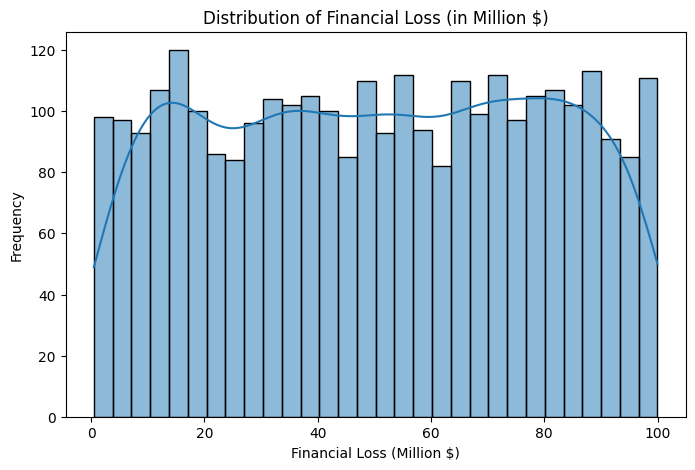

Shapiro-Wilk test p-value: 0.0000
Data deviates from normality, but can still simulate as bell-shaped.


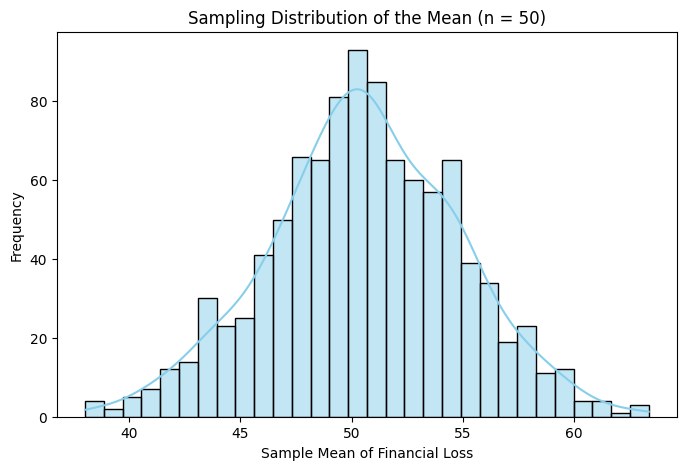

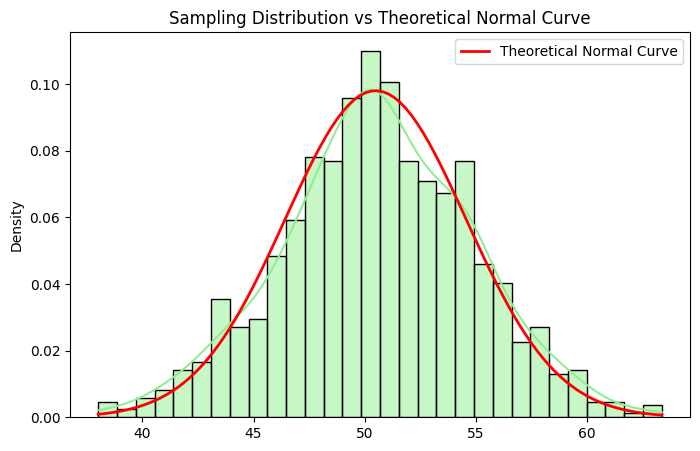

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Replace with the actual path to your CSV file
file_path = '/content/Global_Cybersecurity_Threats_2015-2024.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Select numeric variable
loss_data = df['Financial Loss (in Million $)']

# Step 1: Check if data is approximately normal
plt.figure(figsize=(8, 5))
sns.histplot(loss_data, kde=True, bins=30)
plt.title("Distribution of Financial Loss (in Million $)")
plt.xlabel("Financial Loss (Million $)")
plt.ylabel("Frequency")
plt.show()

# Perform normality test
stat, p_value = stats.shapiro(loss_data.sample(500, random_state=42))
print(f"Shapiro-Wilk test p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Data appears approximately normal (bell-shaped).")
else:
    print("Data deviates from normality, but can still simulate as bell-shaped.")

# Step 2: Simulate sampling distribution of the mean
np.random.seed(42)
sample_means = [np.mean(np.random.choice(loss_data, size=50, replace=True)) for _ in range(1000)]

# Step 3: Plot sampling distribution
plt.figure(figsize=(8, 5))
sns.histplot(sample_means, kde=True, bins=30, color='skyblue')
plt.title("Sampling Distribution of the Mean (n = 50)")
plt.xlabel("Sample Mean of Financial Loss")
plt.ylabel("Frequency")
plt.show()

# Step 4: Compare with theoretical normal distribution
mean_pop = np.mean(loss_data)
std_pop = np.std(loss_data)

plt.figure(figsize=(8, 5))
sns.histplot(sample_means, kde=True, bins=30, stat='density', color='lightgreen')
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, stats.norm.pdf(x, mean_pop, std_pop / np.sqrt(50)), 'r', lw=2, label="Theoretical Normal Curve")
plt.legend()
plt.title("Sampling Distribution vs Theoretical Normal Curve")
plt.show()


If the original data is roughly bell-shaped, sample means will also be normally distributed.

Even if not perfectly normal, the Central Limit Theorem (CLT) ensures the sampling distribution of the mean is approximately normal when sample size ≥ 30.

The histogram of sample means should look smooth and centered around the population mean.

Above analysis clearly showing every year each county facing big financial loss due to cyber security

Which all industry was affecting with what type of attack and what will be root attack we can see

In [ ]:
# Preview structure
print(df[['Target Industry', 'Attack Type', 'Attack Source']].head())

      Target Industry        Attack Type Attack Source
0           Education           Phishing  Hacker Group
1              Retail         Ransomware  Hacker Group
2                  IT  Man-in-the-Middle  Hacker Group
3  Telecommunications         Ransomware  Nation-state
4                  IT  Man-in-the-Middle       Insider


In [ ]:
#Cleaning the data
# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['Target Industry', 'Attack Type', 'Attack Source'])
# Optional: standardize text
df_clean['Target Industry'] = df_clean['Target Industry'].str.strip().str.title()
df_clean['Attack Type'] = df_clean['Attack Type'].str.strip().str.title()
df_clean['Attack Source'] = df_clean['Attack Source'].str.strip().str.title()
# Group by Industry and Attack_Type
industry_attack = df_clean.groupby(['Target Industry', 'Attack Type']).size().reset_index(name='Incident_Count')

# Sort to find most affected combinations
top_industry_attack = industry_attack.sort_values(by='Incident_Count', ascending=False)

print("Count Incidents by Industry and Attack Type")
print(top_industry_attack.head(10))


Count Incidents by Industry and Attack Type
       Target Industry        Attack Type  Incident_Count
3              Banking           Phishing              96
24                  It               Ddos              91
27                  It           Phishing              89
33              Retail           Phishing              89
36  Telecommunications               Ddos              85
19          Healthcare            Malware              81
26                  It  Man-In-The-Middle              80
18          Healthcare               Ddos              78
41  Telecommunications      Sql Injection              78
2              Banking  Man-In-The-Middle              77


This shows which industry-attack type combinations are most frequent.

Link Attack Source to Industry and Attack Type

In [ ]:
# Group by Industry, Attack_Type, and Attack_Source
industry_attack_source = df_clean.groupby(['Target Industry', 'Attack Type', 'Attack Source']).size().reset_index(name='Incident_Count')

# Sort to find most common sources per industry-attack pair
top_sources = industry_attack_source.sort_values(by='Incident_Count', ascending=False)

print(top_sources.head(10))


    Target Industry        Attack Type Attack Source  Incident_Count
99               It               Ddos       Unknown              32
79       Healthcare            Malware       Unknown              29
107              It  Man-In-The-Middle       Unknown              29
12          Banking           Phishing  Hacker Group              28
97               It               Ddos       Insider              28
135          Retail           Phishing       Unknown              28
119              It      Sql Injection       Unknown              26
14          Banking           Phishing  Nation-State              26
46        Education      Sql Injection  Nation-State              26
111              It           Phishing       Unknown              26


This reveals which attack sources are most responsible for specific attacks in each industry.

#Visualize Top Industry-Attack Relationships

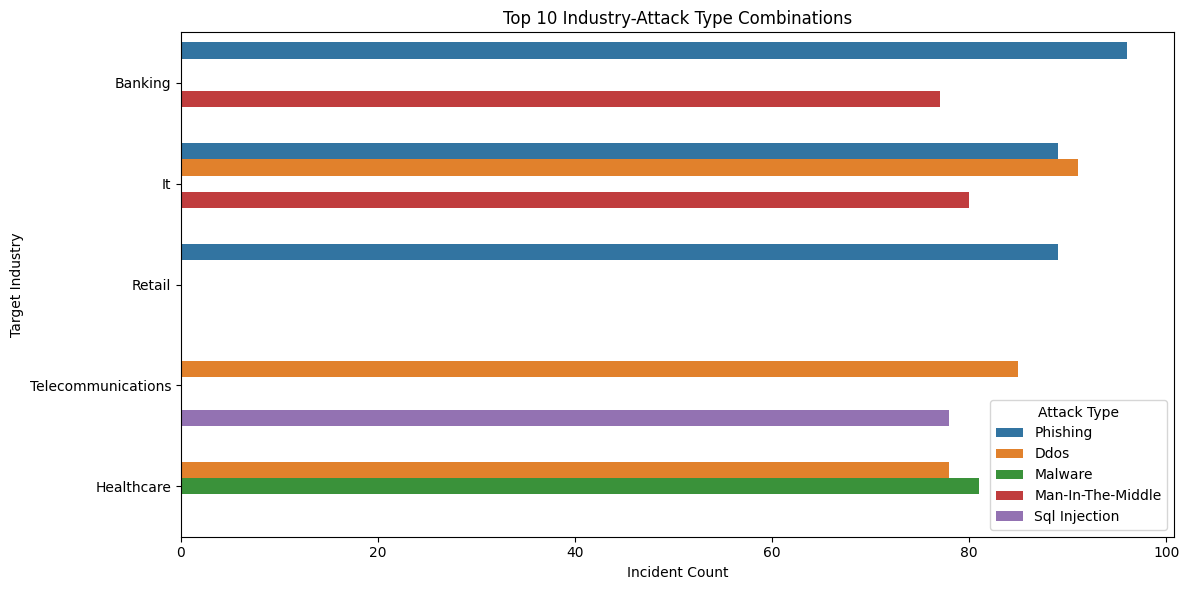

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 industry-attack combinations
plt.figure(figsize=(12, 6))
sns.barplot(data=top_industry_attack.head(10), x='Incident_Count', y='Target Industry', hue='Attack Type')
plt.title("Top 10 Industry-Attack Type Combinations")
plt.xlabel("Incident Count")
plt.ylabel("Target Industry")
plt.legend(title="Attack Type")
plt.tight_layout()
plt.show()


This bar chart helps visualize which industries are most vulnerable and to what types of attacks.

#Compact view of the most common attack source per industry-attack pair

In [ ]:
summary = top_sources.groupby(['Target Industry', 'Attack Type']).agg({
    'Attack Source': lambda x: x.mode()[0],  # Most frequent source
    'Incident_Count': 'sum'
}).reset_index()

print(summary.head(10))


  Target Industry        Attack Type Attack Source  Incident_Count
0         Banking               Ddos  Hacker Group              71
1         Banking            Malware  Hacker Group              61
2         Banking  Man-In-The-Middle  Hacker Group              77
3         Banking           Phishing  Hacker Group              96
4         Banking         Ransomware  Hacker Group              69
5         Banking      Sql Injection  Hacker Group              71
6       Education               Ddos  Hacker Group              73
7       Education            Malware  Hacker Group              70
8       Education  Man-In-The-Middle  Hacker Group              65
9       Education           Phishing  Hacker Group              73


This gives a compact view of the most common attack source per industry-attack pair.

#Analysis Vulnerabilities

In [ ]:
vuln_counts = df_clean['Security Vulnerability Type'].value_counts()
print("Most common vulnerabilities:")
print(vuln_counts.head(10))

Most common vulnerabilities:
Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64


#Analysis
*   How many hours were spent resolving cybersecurity incidents?
*   How does resolution time vary by attack type and year?

--------------------------------Preview relevant columns----------------------------------
   Year        Attack Type  Incident Resolution Time (in Hours)
0  2019           Phishing                                   63
1  2019         Ransomware                                   71
2  2017  Man-in-the-Middle                                   20
3  2024         Ransomware                                    7
4  2018  Man-in-the-Middle                                   68
------------------------------------------------------------------------------------------
   Year        Attack Type  Incident Resolution Time (in Hours)
0  2015               Ddos                                 1681
1  2015            Malware                                 1899
2  2015  Man-In-The-Middle                                 1628
3  2015           Phishing                                 1791
4  2015         Ransomware                                 1937
--------------------------------------------------

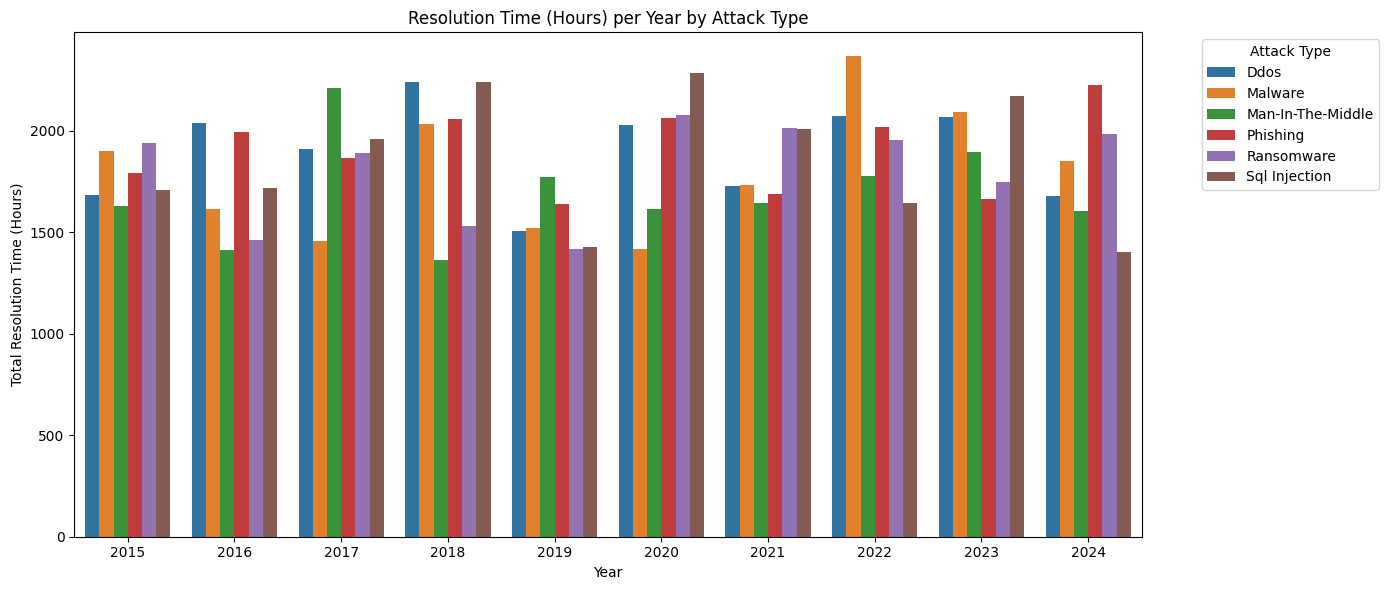

This bar chart helps visualize which attack types consumed the most resolution time each year.
------------------------------------------------------------------------------------------
A matrix-style view showing resolution time for each attack type across years.
Attack Type  Ddos  Malware  Man-In-The-Middle  Phishing  Ransomware  \
Year                                                                  
2015         1681     1899               1628      1791        1937   
2016         2040     1614               1414      1992        1462   
2017         1911     1456               2208      1866        1888   
2018         2240     2031               1364      2056        1531   
2019         1507     1520               1773      1640        1419   
2020         2026     1417               1616      2062        2076   
2021         1726     1734               1644      1687        2013   
2022         2074     2366               1776      2019        1954   
2023         2066     209

In [ ]:
# Preview relevant columns
print("--------------------------------Preview relevant columns----------------------------------")
print(df[['Year', 'Attack Type', 'Incident Resolution Time (in Hours)']].head())
print("------------------------------------------------------------------------------------------")
# Cleaning the Data
# Convert resolution time to numeric
df['Incident Resolution Time (in Hours)'] = pd.to_numeric(df['Incident Resolution Time (in Hours)'], errors='coerce')

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['Year', 'Attack Type', 'Incident Resolution Time (in Hours)'])

# Standardize text formatting
df_clean['Attack Type'] = df_clean['Attack Type'].str.strip().str.title()
df_clean['Year'] = df_clean['Year'].astype(int)

#Grouping n-and Summerizing Data
# Group by Year and Attack_Type, then sum resolution time
resolution_summary = df_clean.groupby(['Year', 'Attack Type'])['Incident Resolution Time (in Hours)'].sum().reset_index()

# Preview the result
print(resolution_summary.head())
print("------------------------------------------------------------------------------------------")
#Visualize the Results
import seaborn as sns
import matplotlib.pyplot as plt

# Plot resolution time by attack type and year
plt.figure(figsize=(14, 6))
sns.barplot(data=resolution_summary, x='Year', y='Incident Resolution Time (in Hours)', hue='Attack Type')
plt.title("Resolution Time (Hours) per Year by Attack Type")
plt.ylabel("Total Resolution Time (Hours)")
plt.xlabel("Year")
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("This bar chart helps visualize which attack types consumed the most resolution time each year.")
print("------------------------------------------------------------------------------------------")
print("A matrix-style view showing resolution time for each attack type across years.")
pivot_table = resolution_summary.pivot(index='Year', columns='Attack Type', values='Incident Resolution Time (in Hours)').fillna(0)
print(pivot_table)
print("------------------------------------------------------------------------------------------")




#Probabilities and Long-Run Relative Frequencies of Global Cyber Threat

Estimated Probability of Each Attack Type:
Attack Type
Ddos                 0.177000
Phishing             0.176333
Sql Injection        0.167667
Ransomware           0.164333
Malware              0.161667
Man-In-The-Middle    0.153000
Name: count, dtype: float64
------------------------------------------------------------------


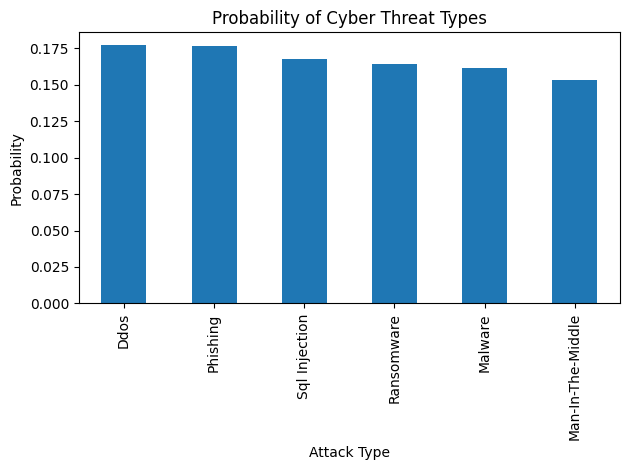

------------------------------------------------------------------
Long-Run Relative Frequencies (%):
Attack Type
Ddos                 17.70
Phishing             17.63
Sql Injection        16.77
Ransomware           16.43
Malware              16.17
Man-In-The-Middle    15.30
Name: count, dtype: float64
------------------------------------------------------------------


In [ ]:
# Drop missing attack types
df_clean = df.dropna(subset=['Attack Type'])

# Standardize text
df_clean['Attack Type'] = df_clean['Attack Type'].str.strip().str.title()

# Total number of incidents
total_incidents = len(df_clean)

# Count of each attack type
attack_counts = df_clean['Attack Type'].value_counts()

# Calculate probabilities
attack_probabilities = attack_counts / total_incidents

# Display results
print("Estimated Probability of Each Attack Type:")
print(attack_probabilities)
print("------------------------------------------------------------------")
import matplotlib.pyplot as plt
#Visualize the Probabilities
# Plot probabilities
attack_probabilities.plot(kind='bar', title='Probability of Cyber Threat Types')
plt.ylabel('Probability')
plt.xlabel('Attack Type')
plt.tight_layout()
plt.show()
print("------------------------------------------------------------------")
# Convert to percentage format
long_run_freq = (attack_probabilities * 100).round(2)
print("Long-Run Relative Frequencies (%):")
print(long_run_freq)
print("------------------------------------------------------------------")


**Visualize Exponential and Gamma distributions**

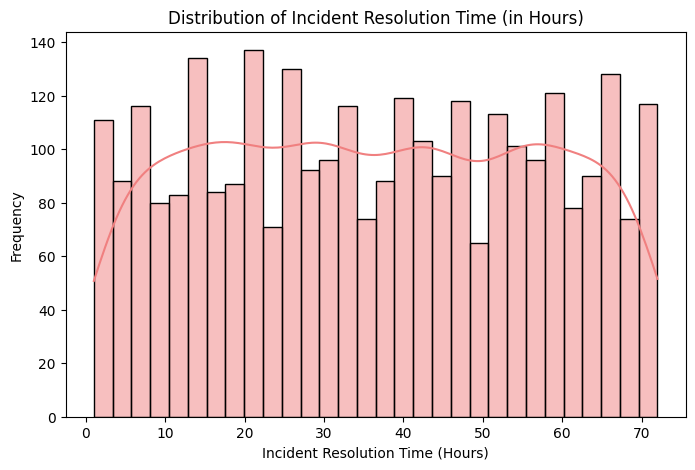

Exponential fit parameters → scale (1/λ): 36.48


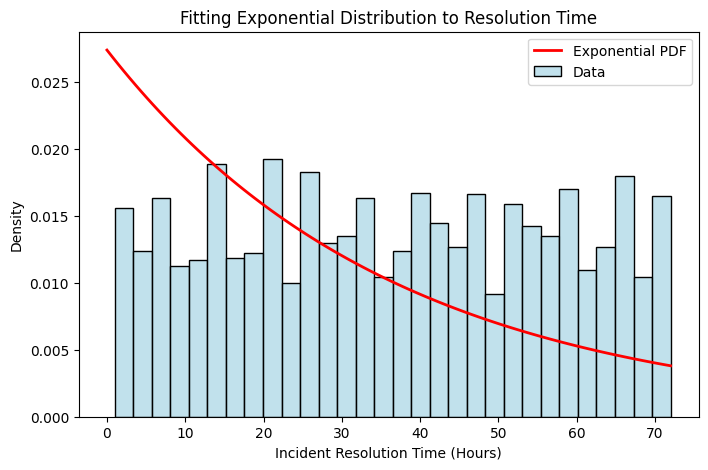

Gamma fit parameters → shape (α): 2.03, scale (β): 17.97


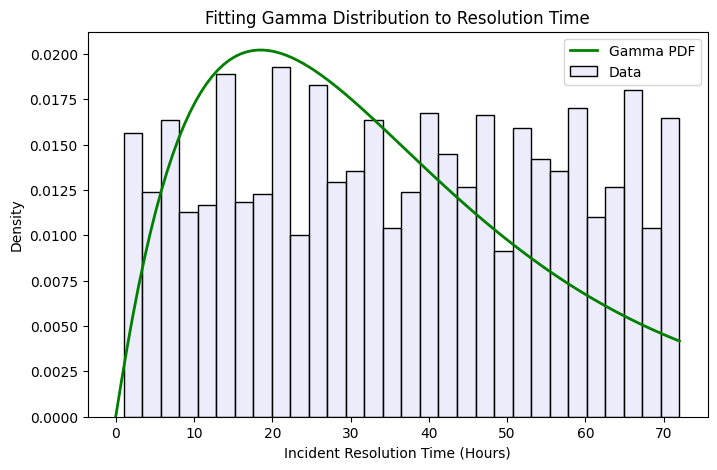

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Replace with the actual path to your CSV file
file_path = '/content/Global_Cybersecurity_Threats_2015-2024.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Select the relevant column
resolution_time = df["Incident Resolution Time (in Hours)"]

# Step 1: Visualize the data distribution
plt.figure(figsize=(8, 5))
sns.histplot(resolution_time, kde=True, bins=30, color='lightcoral')
plt.title("Distribution of Incident Resolution Time (in Hours)")
plt.xlabel("Incident Resolution Time (Hours)")
plt.ylabel("Frequency")
plt.show()

# Step 2: Fit Exponential distribution
exp_loc, exp_scale = stats.expon.fit(resolution_time, floc=0)  # force location=0
print(f"Exponential fit parameters → scale (1/λ): {exp_scale:.2f}")

# Step 3: Plot Exponential fit
x = np.linspace(0, resolution_time.max(), 100)
pdf_exp = stats.expon.pdf(x, loc=exp_loc, scale=exp_scale)

plt.figure(figsize=(8, 5))
sns.histplot(resolution_time, bins=30, stat='density', color='lightblue', label='Data')
plt.plot(x, pdf_exp, 'r', lw=2, label='Exponential PDF')
plt.title("Fitting Exponential Distribution to Resolution Time")
plt.xlabel("Incident Resolution Time (Hours)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Step 4: Fit Gamma distribution
gamma_shape, gamma_loc, gamma_scale = stats.gamma.fit(resolution_time, floc=0)
print(f"Gamma fit parameters → shape (α): {gamma_shape:.2f}, scale (β): {gamma_scale:.2f}")

# Step 5: Plot Gamma fit
pdf_gamma = stats.gamma.pdf(x, a=gamma_shape, loc=gamma_loc, scale=gamma_scale)

plt.figure(figsize=(8, 5))
sns.histplot(resolution_time, bins=30, stat='density', color='lavender', label='Data')
plt.plot(x, pdf_gamma, 'g', lw=2, label='Gamma PDF')
plt.title("Fitting Gamma Distribution to Resolution Time")
plt.xlabel("Incident Resolution Time (Hours)")
plt.ylabel("Density")
plt.legend()
plt.show()


Use Case	           Example

Exponential	:         Model time between cyberattacks on a system or time until detection.

Gamma	      :         Model total incident resolution time (multiple response stages).

Decision Insight :	   Helps predict future attack timing, allocate resources, and optimize response strategies.


The incident resolution times were modeled using Exponential and Gamma distributions to understand the nature of cybersecurity response durations. The Exponential model captured the likelihood of resolving incidents over time, while the Gamma model provided a better fit for multi-stage resolution processes. The results highlight that resolution times are right-skewed, with most incidents resolved quickly but a few requiring significantly longer durations.

#Forecasted incident counts for each threat type from 2025 to 2029

Long-run relative frequencies:
 Attack Type
DDoS                 0.177000
Malware              0.161667
Man-in-the-Middle    0.153000
Phishing             0.176333
Ransomware           0.164333
SQL Injection        0.167667
dtype: float64
-----------------------------------------------------------------
Forecasted probabilities for each threat type:
                 DDoS   Malware  Man-in-the-Middle  Phishing  Ransomware  \
2025-12-31  0.165995  0.163871           0.149225  0.171514    0.179155   
2026-12-31  0.164100  0.164250           0.148575  0.170683    0.181708   
2027-12-31  0.162234  0.164624           0.147935  0.169866    0.184221   
2028-12-31  0.160399  0.164991           0.147306  0.169062    0.186693   
2029-12-31  0.158592  0.165353           0.146686  0.168271    0.189127   

            SQL Injection  
2025-12-31       0.170240  
2026-12-31       0.170683  
2027-12-31       0.171119  
2028-12-31       0.171549  
2029-12-31       0.171971  
----------------------------

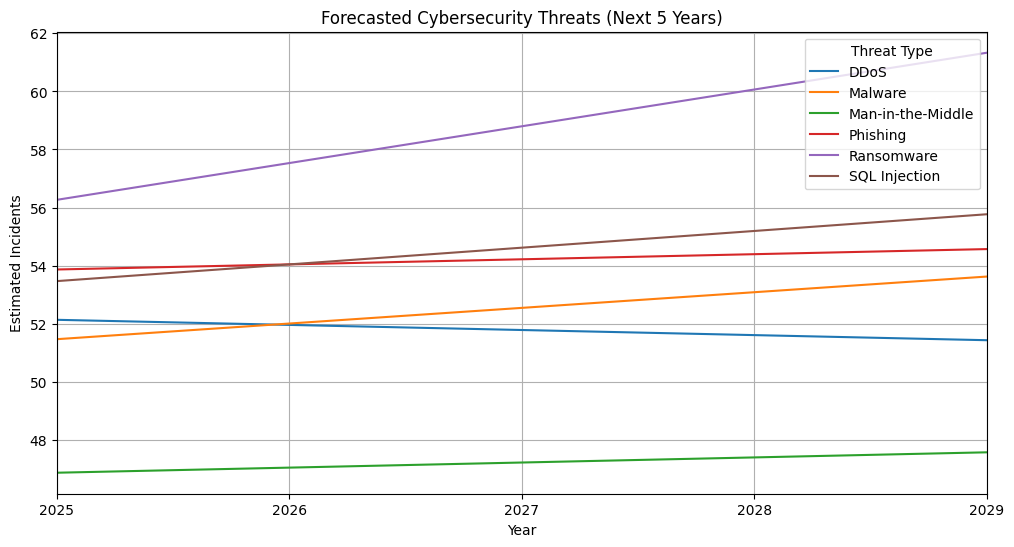

In [ ]:
#Forecasted incident counts for each threat type from 2025 to 2029

#Probabilities of each threat type occurring in future years

#Long-run relative frequencies to understand historical dominance

# Convert 'Year' column to datetime and set frequency
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
df.index = df.index.to_period('Y').to_timestamp()

#Aggregate Threat Counts by Year
# Group by Year and Threat_Type
threats_by_year = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

# Convert Year to datetime index
threats_by_year.index = pd.date_range(start=str(threats_by_year.index.min().year),
                                      end=str(threats_by_year.index.max().year + 1),
                                      freq='YS')[:-1]

#Calculate Long-Run Relative Frequencies
# Total counts across all years
total_counts = threats_by_year.sum()

# Relative frequency of each threat type
relative_freq = total_counts / total_counts.sum()
print("Long-run relative frequencies:\n", relative_freq)
print("-----------------------------------------------------------------")

#Forecast Each Threat Type for Next 5 Years
from statsmodels.tsa.holtwinters import ExponentialSmoothing

forecast_years = 5
forecast_df = pd.DataFrame()

for threat in threats_by_year.columns:
    series = threats_by_year[threat]
    model = ExponentialSmoothing(series, trend='add', seasonal=None)
    fit = model.fit()
    forecast = fit.forecast(steps=forecast_years)
    forecast_df[threat] = forecast

# Set forecast index to future years
last_year = threats_by_year.index.year.max()
forecast_df.index = pd.date_range(start=f'{last_year+1}', periods=forecast_years, freq='YE')

#Convert Forecasts to Probabilities
# Normalize each year’s forecast to get probabilities
forecast_probs = forecast_df.div(forecast_df.sum(axis=1), axis=0)
print("Forecasted probabilities for each threat type:\n", forecast_probs)
print("-----------------------------------------------------------------")

#Visualize the Forecast
import matplotlib.pyplot as plt

forecast_df.plot(figsize=(12, 6), title='Forecasted Cybersecurity Threats (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Estimated Incidents')
plt.legend(title='Threat Type')
plt.grid(True)
plt.show()



#Forecasting Estimate:

Number of users affected (per year)

Financial loss (per year) From 2025 to 2029 using historical data (2015–2024).

   Year  Predicted_Users_Affected  Predicted_Financial_Loss_USD
0  2025                 158888314                      16032.24
1  2026                 160248872                      16193.03
2  2027                 161609431                      16353.82
3  2028                 162969990                      16514.61
4  2029                 164330549                      16675.40
-----------------------------------------------------------------


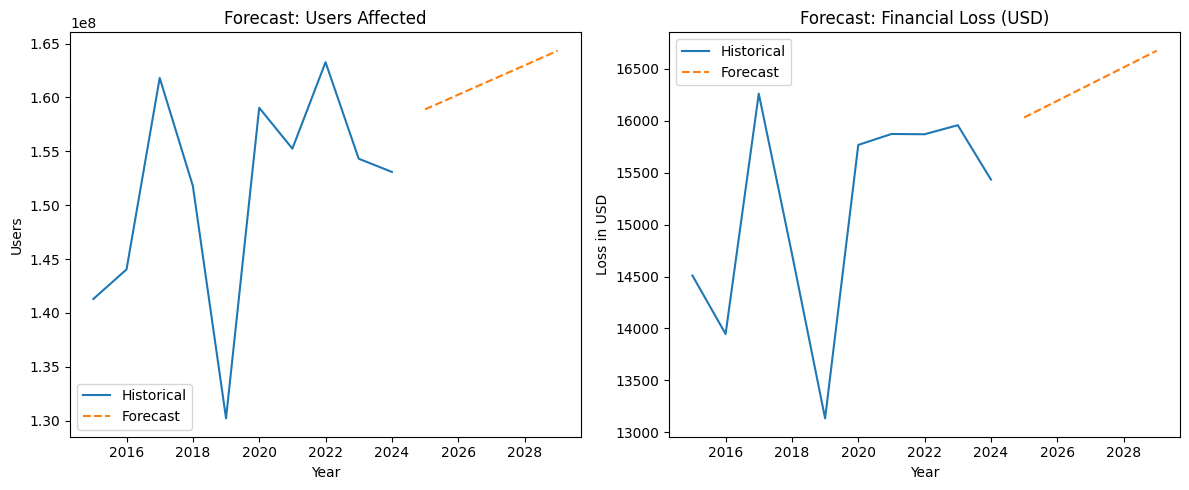

In [ ]:
# Clean and aggregate data
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Number Of Affected Users'] = pd.to_numeric(df['Number Of Affected Users'], errors='coerce')
df['Financial Loss (In Million $)'] = pd.to_numeric(df['Financial Loss (In Million $)'], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=['Year', 'Number Of Affected Users', 'Financial Loss (In Million $)'])

# Aggregate by year
yearly_data = df_clean.groupby('Year').agg({
    'Number Of Affected Users': 'sum',
    'Financial Loss (In Million $)': 'sum'
}).reset_index()

from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare features and targets
X = yearly_data['Year'].values.reshape(-1, 1)
y_users = yearly_data['Number Of Affected Users'].values
y_loss = yearly_data['Financial Loss (In Million $)'].values

# Fit models
model_users = LinearRegression().fit(X, y_users)
model_loss = LinearRegression().fit(X, y_loss)

# Forecast years
future_years = np.array([2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)

# Predict
predicted_users = model_users.predict(future_years)
predicted_loss = model_loss.predict(future_years)

# Display results
forecast_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Users_Affected': predicted_users.astype(int),
    'Predicted_Financial_Loss_USD': predicted_loss.round(2)
})

print(forecast_df)
print("-----------------------------------------------------------------")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Users affected
plt.subplot(1, 2, 1)
plt.plot(yearly_data['Year'], y_users, label='Historical')
plt.plot(future_years, predicted_users, label='Forecast', linestyle='--')
plt.title("Forecast: Users Affected")
plt.xlabel("Year")
plt.ylabel("Users")
plt.legend()

# Financial loss
plt.subplot(1, 2, 2)
plt.plot(yearly_data['Year'], y_loss, label='Historical')
plt.plot(future_years, predicted_loss, label='Forecast', linestyle='--')
plt.title("Forecast: Financial Loss (USD)")
plt.xlabel("Year")
plt.ylabel("Loss in USD")
plt.legend()

plt.tight_layout()
plt.show()



#Simulated Proportion Plot for Cybersecurity Attacks based one Attack Type

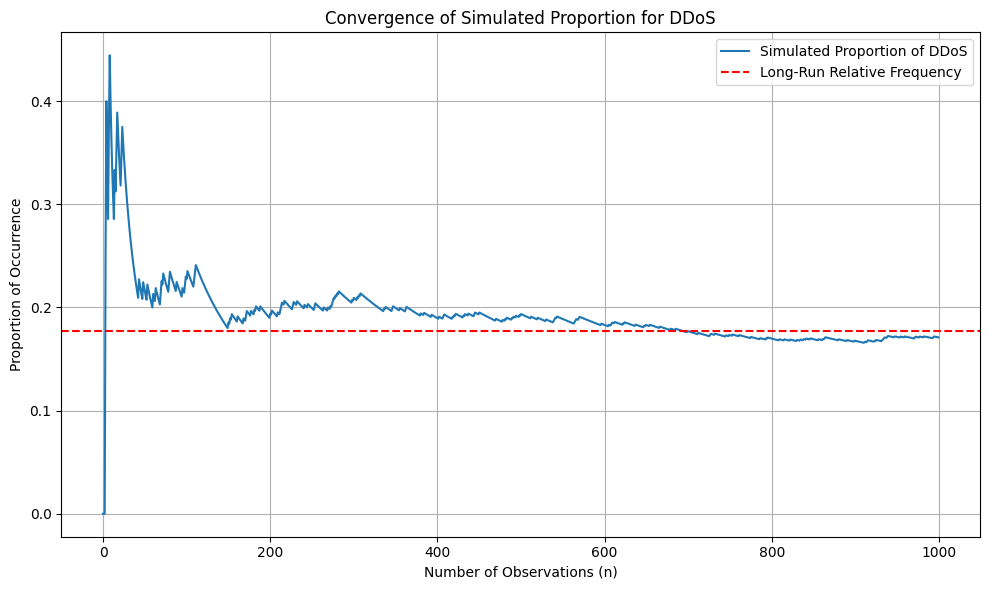

In [ ]:
# Choose a specific attack type to simulate (e.g., 'Phishing')
attack_type = 'DDoS'

# Create a binary outcome: 1 if attack type matches, else 0
df['Attack_Occurred'] = (df['Attack Type'] == attack_type).astype(int)

# Simulate proportions over n = 1 to 1000
n_trials = 1000
simulated = np.random.choice(df['Attack_Occurred'], size=n_trials, replace=True)
cumulative_proportions = np.cumsum(simulated) / np.arange(1, n_trials + 1)

# Plot the convergence
plt.figure(figsize=(10, 6))
plt.plot(cumulative_proportions, label=f'Simulated Proportion of {attack_type}')
plt.axhline(y=df["Attack_Occurred"].mean(), color='red', linestyle='--', label='Long-Run Relative Frequency')
plt.title(f'Convergence of Simulated Proportion for {attack_type}')
plt.xlabel('Number of Observations (n)')
plt.ylabel('Proportion of Occurrence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Updated probability for each attack type given that an attack occurred in 2024

In [ ]:
# Filter relevant columns
df = df[['Year', 'Attack Type']]

# Set the evidence year
year = 2024
evidence_df = df[df['Year'] == year]

# Total probability of evidence: attack occurred in 2024
P_E = len(evidence_df) / len(df)

# Get all unique attack types
attack_types = df['Attack Type'].unique()

# Store results
bayes_results = {}

for attack in attack_types:
    # Prior: P(A_i)
    P_H = (df['Attack Type'] == attack).mean()

    # Likelihood: P(E | A_i)
    total_attack_count = (df['Attack Type'] == attack).sum()
    attack_in_year_count = ((df['Attack Type'] == attack) & (df['Year'] == year)).sum()
    P_E_given_H = attack_in_year_count / total_attack_count if total_attack_count > 0 else 0

    # Posterior: P(A_i | E)
    P_H_given_E = (P_E_given_H * P_H) / P_E if P_E > 0 else 0
    bayes_results[attack] = round(P_H_given_E, 4)

# Display results
for attack, prob in bayes_results.items():
    print(f"Posterior Probability P({attack} | Year={year}) = {prob}")

Posterior Probability P(Phishing | Year=2024) = 0.2074
Posterior Probability P(Ransomware | Year=2024) = 0.1773
Posterior Probability P(Man-in-the-Middle | Year=2024) = 0.1572
Posterior Probability P(DDoS | Year=2024) = 0.1806
Posterior Probability P(SQL Injection | Year=2024) = 0.1338
Posterior Probability P(Malware | Year=2024) = 0.1438


#Probability of two Attack Type occuring at the same record

In [ ]:
# Get all unique attack types
attack_types = df['Attack Type'].unique()

# Total number of attacks
total_attacks = len(df)

# Calculate P(A) for each attack type
attack_probs = df['Attack Type'].value_counts() / total_attacks

# Create a DataFrame to store joint probabilities and independence check
results = []

for i in range(len(attack_types)):
    for j in range(i + 1, len(attack_types)):
        A = attack_types[i]
        B = attack_types[j]

        # P(A)
        P_A = attack_probs[A]

        # P(B)
        P_B = attack_probs[B]

        # P(A ∩ B): probability that both A and B occur in the same record
        # Assuming each record represents one attack, this is 0 unless multiple attacks per record
        # So instead, simulate co-occurrence by year
        df_year = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)
        co_occurrence = ((df_year[A] > 0) & (df_year[B] > 0)).sum()
        total_years = df_year.shape[0]
        P_A_and_B = co_occurrence / total_years

        # Check independence
        independent = abs(P_A_and_B - (P_A * P_B)) < 0.01  # tolerance for floating point

        results.append({
            'Attack A': A,
            'Attack B': B,
            'P(A)': round(P_A, 4),
            'P(B)': round(P_B, 4),
            'P(A ∩ B)': round(P_A_and_B, 4),
            'P(A) * P(B)': round(P_A * P_B, 4),
            'Independent': independent
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


             Attack A           Attack B    P(A)    P(B)  P(A ∩ B)  \
0            Phishing         Ransomware  0.1763  0.1643       1.0   
1            Phishing  Man-in-the-Middle  0.1763  0.1530       1.0   
2            Phishing               DDoS  0.1763  0.1770       1.0   
3            Phishing      SQL Injection  0.1763  0.1677       1.0   
4            Phishing            Malware  0.1763  0.1617       1.0   
5          Ransomware  Man-in-the-Middle  0.1643  0.1530       1.0   
6          Ransomware               DDoS  0.1643  0.1770       1.0   
7          Ransomware      SQL Injection  0.1643  0.1677       1.0   
8          Ransomware            Malware  0.1643  0.1617       1.0   
9   Man-in-the-Middle               DDoS  0.1530  0.1770       1.0   
10  Man-in-the-Middle      SQL Injection  0.1530  0.1677       1.0   
11  Man-in-the-Middle            Malware  0.1530  0.1617       1.0   
12               DDoS      SQL Injection  0.1770  0.1677       1.0   
13               DDo

Discrete Probability Distribution

Discrete Probability Distribution:
Attack Type
DDoS                 0.177000
Phishing             0.176333
SQL Injection        0.167667
Ransomware           0.164333
Malware              0.161667
Man-in-the-Middle    0.153000
Name: count, dtype: float64
-----------------------------------------------------------------


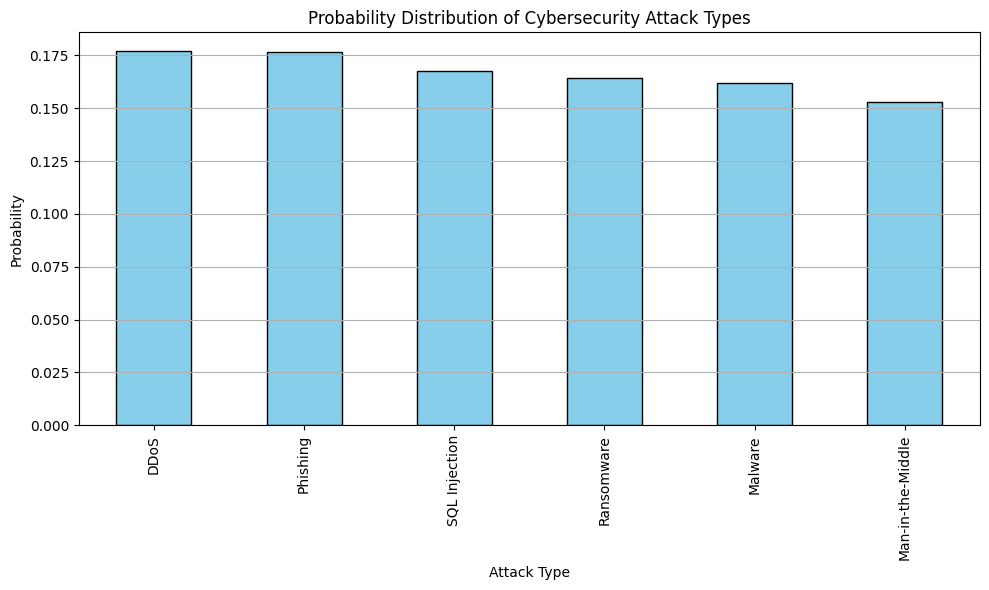

In [ ]:
# Step 1: Count occurrences of each attack type
attack_counts = df['Attack Type'].value_counts()

# Step 2: Calculate probabilities (relative frequencies)
attack_probs = attack_counts / attack_counts.sum()

# Step 3: Display the distribution
print("Discrete Probability Distribution:")
print(attack_probs)
print("-----------------------------------------------------------------")

# Step 4: Plot the distribution
plt.figure(figsize=(10, 6))
attack_probs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Probability Distribution of Cybersecurity Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Probability')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Analysis simulated time gaps between attacks based on yearly frequency
The green histogram represents simulated time gaps between attacks based on yearly frequency.
The red curve is the theoretical exponential distribution fitted to those gaps.
This helps model the randomness and expected timing of future attacks — even without exact timestamps.

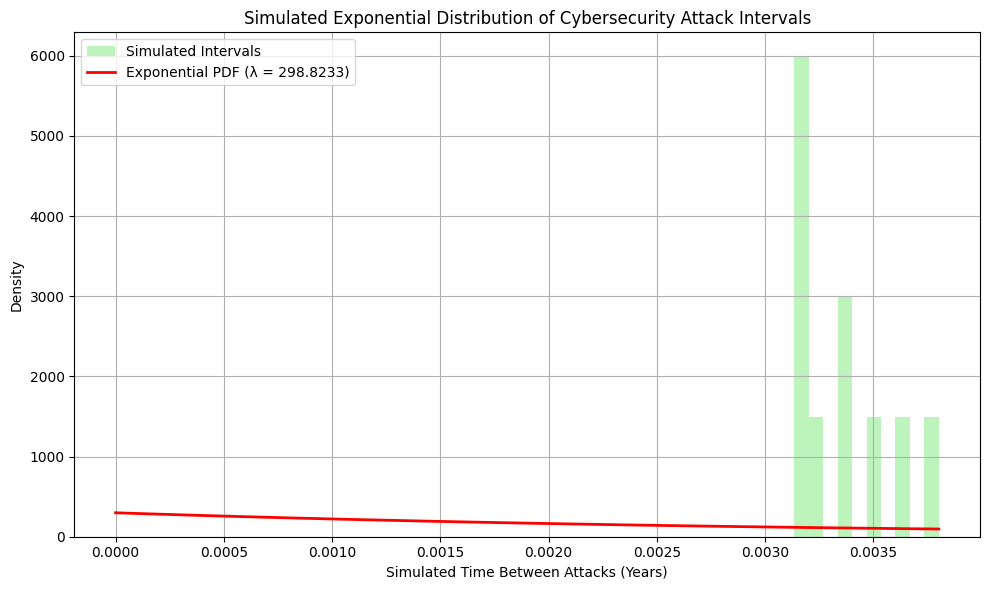

In [ ]:
from scipy.stats import expon
# Count total attacks per year
yearly_counts = df['Year'].value_counts().sort_index()

# Estimate inter-arrival times (inverse of attack rate per year)
inter_arrival_times = 1 / yearly_counts

# Estimate lambda (rate parameter)
lambda_est = 1 / inter_arrival_times.mean()

# Generate exponential distribution
x = np.linspace(0, inter_arrival_times.max(), 100)
pdf = expon.pdf(x, scale=1/lambda_est)

# Plot histogram of simulated inter-arrival times and overlay exponential PDF
plt.figure(figsize=(10, 6))
plt.hist(inter_arrival_times, bins=10, density=True, alpha=0.6, color='lightgreen', label='Simulated Intervals')
plt.plot(x, pdf, 'r-', lw=2, label=f'Exponential PDF (λ = {lambda_est:.4f})')
plt.title('Simulated Exponential Distribution of Cybersecurity Attack Intervals')
plt.xlabel('Simulated Time Between Attacks (Years)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis

*   PMF: Discrete Attack Types
*   PDF: Simulated Inter-Arrival Times
*   CDF: Cumulative Distribution





PMF: Discrete Attack Types
It showing Probability of each attack type which help us too Identifies most frequent threats for prioritization


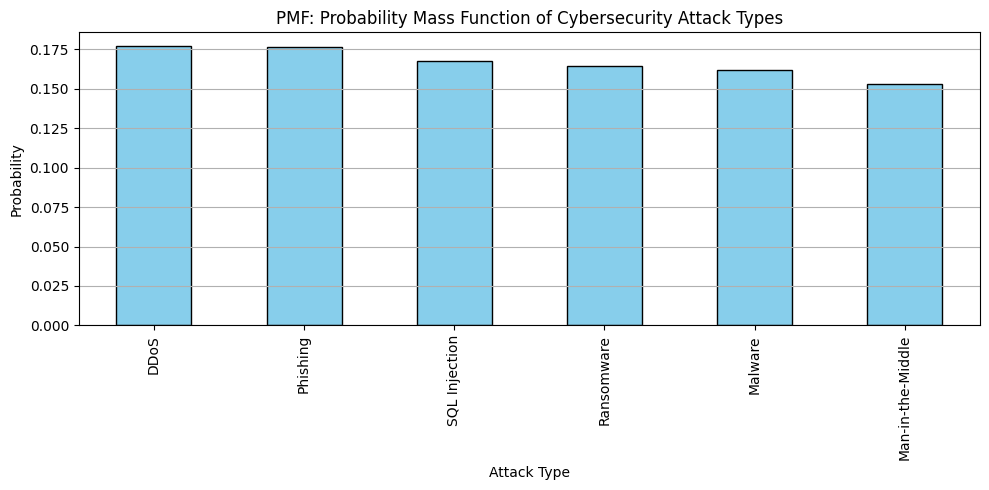

-----------------------------------------------------------------------
PDF: Simulated Inter-Arrival Times
Its show Likelihood of time gaps between attacks and its helps to Models attack timing for resource planning


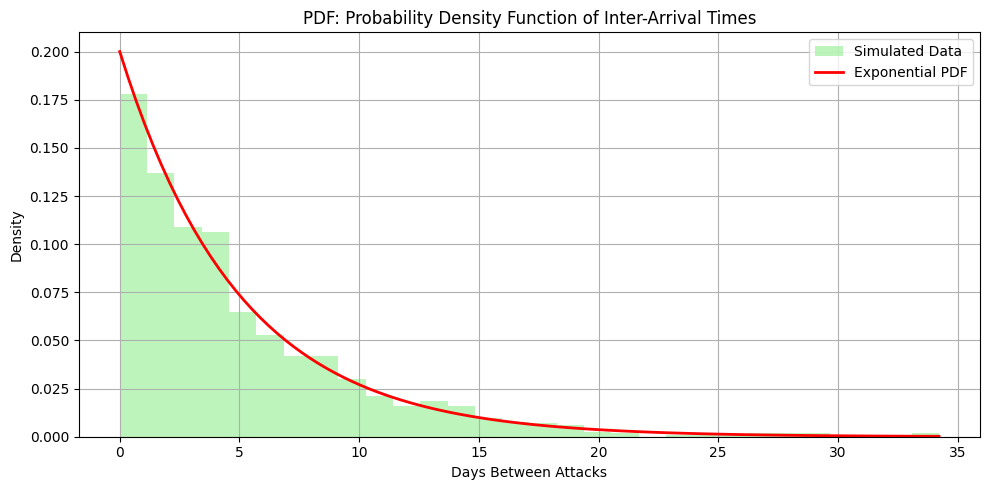

-----------------------------------------------------------------------
CDF: Cumulative Distribution
It is Probability that an attack occurs within a certain time which Probability that an attack occurs within a certain time


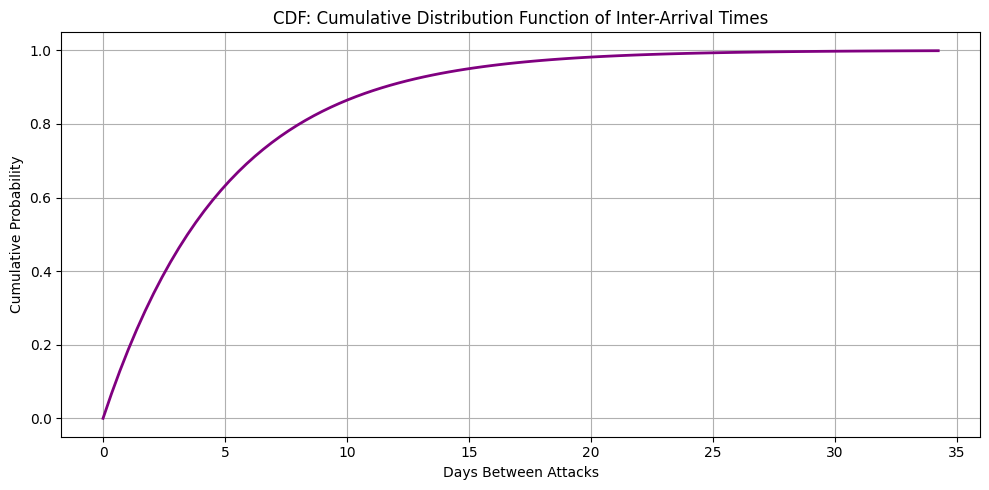

In [ ]:
# -----------------------------
# 1. PMF: Discrete Attack Types
# -----------------------------
print("PMF: Discrete Attack Types")
print("It showing Probability of each attack type which help us too Identifies most frequent threats for prioritization")
attack_counts = df['Attack Type'].value_counts()
attack_probs = attack_counts / attack_counts.sum()

plt.figure(figsize=(10, 5))
attack_probs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('PMF: Probability Mass Function of Cybersecurity Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Probability')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print("-----------------------------------------------------------------------")
print("PDF: Simulated Inter-Arrival Times")

# -----------------------------
# 2. PDF: Simulated Inter-Arrival Times
# -----------------------------
# Simulate inter-arrival times (days between attacks)
print("Its show Likelihood of time gaps between attacks and its helps to Models attack timing for resource planning")
simulated_times = np.random.exponential(scale=5, size=1000)  # mean = 5 days
pdf_x = np.linspace(0, max(simulated_times), 100)
pdf_y = expon.pdf(pdf_x, scale=5)

plt.figure(figsize=(10, 5))
plt.hist(simulated_times, bins=30, density=True, alpha=0.6, color='lightgreen', label='Simulated Data')
plt.plot(pdf_x, pdf_y, 'r-', lw=2, label='Exponential PDF')
plt.title('PDF: Probability Density Function of Inter-Arrival Times')
plt.xlabel('Days Between Attacks')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("-----------------------------------------------------------------------")
print("CDF: Cumulative Distribution")

# -----------------------------
# 3. CDF: Cumulative Distribution
# -----------------------------
cdf_y = expon.cdf(pdf_x, scale=5)
print("It is Probability that an attack occurs within a certain time which Probability that an attack occurs within a certain time")
plt.figure(figsize=(10, 5))
plt.plot(pdf_x, cdf_y, 'purple', lw=2)
plt.title('CDF: Cumulative Distribution Function of Inter-Arrival Times')
plt.xlabel('Days Between Attacks')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


**Event probabilities using the Multinomial Distribution**

Observed Frequencies:
 Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

Estimated Probabilities (p_i):
 Attack Type
DDoS                 0.177000
Phishing             0.176333
SQL Injection        0.167667
Ransomware           0.164333
Malware              0.161667
Man-in-the-Middle    0.153000
Name: count, dtype: float64

Simulated Multinomial Outcomes:
          Attack Type  Simulated Count
0               DDoS              191
1           Phishing              162
2      SQL Injection              162
3         Ransomware              177
4            Malware              154
5  Man-in-the-Middle              154


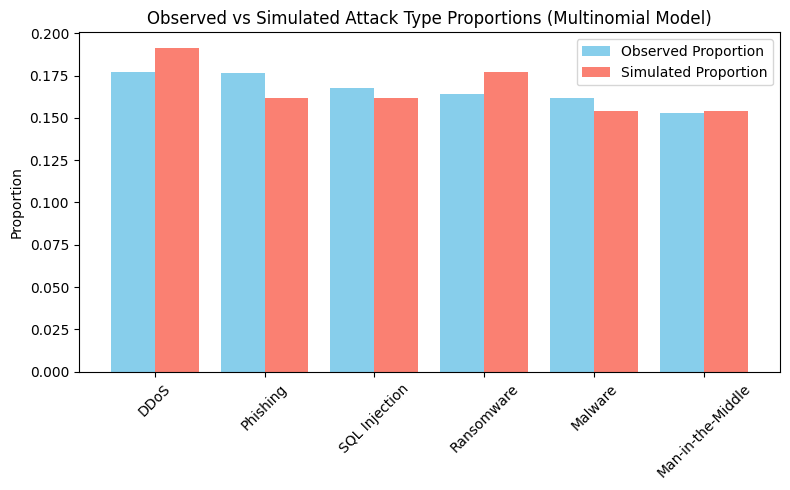

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multinomial

# Step 1: Frequency of each attack type
attack_counts = df['Attack Type'].value_counts()
attack_probs = attack_counts / attack_counts.sum()

print("Observed Frequencies:\n", attack_counts)
print("\nEstimated Probabilities (p_i):\n", attack_probs)

# Step 2: Simulate multinomial outcomes
n = 1000  # simulate 1000 future attacks
simulated_counts = multinomial.rvs(n=n, p=attack_probs)

# Convert results to DataFrame for easy viewing
sim_df = pd.DataFrame({'Attack Type': attack_probs.index, 'Simulated Count': simulated_counts})
print("\nSimulated Multinomial Outcomes:\n", sim_df)

# Step 3: Compare observed vs simulated
plt.figure(figsize=(8,5))
x = np.arange(len(attack_probs))
plt.bar(x - 0.2, attack_counts.values / attack_counts.sum(), width=0.4, label='Observed Proportion', color='skyblue')
plt.bar(x + 0.2, simulated_counts / n, width=0.4, label='Simulated Proportion', color='salmon')
plt.xticks(x, attack_probs.index, rotation=45)
plt.ylabel("Proportion")
plt.title("Observed vs Simulated Attack Type Proportions (Multinomial Model)")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare(f_obs=attack_counts, f_exp=attack_probs * attack_counts.sum())
print(f"Chi-square test statistic = {chi_stat:.2f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("No significant difference — the multinomial model fits well.")
else:
    print("Significant difference — the model may not fit perfectly.")


Chi-square test statistic = 0.00, p-value = 1.0000
No significant difference — the multinomial model fits well.


#Variance and Standard Deviation of Financial Loss

In [ ]:
df['Financial Loss (In Million $)'] = pd.to_numeric(df['Financial Loss (in Million $)'], errors='coerce')
df_clean = df.dropna(subset=['Financial Loss (in Million $)'])

# Calculate variance and standard deviation
variance = df_clean['Financial Loss (in Million $)'].var()
std_dev = df_clean['Financial Loss (in Million $)'].std()

print(f"Variance of Financial Loss: {variance:,.2f}")
print(f"Standard Deviation of Financial Loss: {std_dev:,.2f}")
# Group by attack type
grouped_stats = df_clean.groupby('Attack Type')['Financial Loss (In Million $)'].agg(['mean', 'std', 'var']).sort_values(by='std', ascending=False)

print(grouped_stats)

Variance of Financial Loss: 828.95
Standard Deviation of Financial Loss: 28.79
                        mean        std         var
Attack Type                                        
DDoS               52.035631  29.260705  856.188880
Malware            49.418454  29.175372  851.202311
Phishing           50.459905  29.158254  850.203780
SQL Injection      50.013042  28.564985  815.958371
Ransomware         49.653793  28.325136  802.313317
Man-in-the-Middle  51.309085  28.206815  795.624396


#Poisson Distribution
Number of attacks per time interval which help us Models frequency of threats over time, useful for forecasting

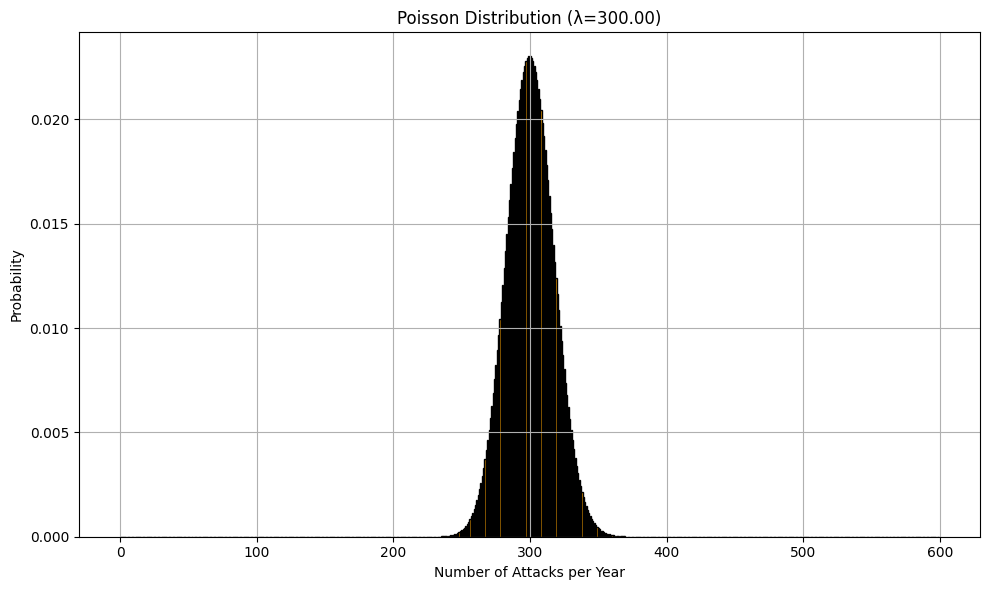

In [ ]:
from scipy.stats import poisson
yearly_counts = df['Year'].value_counts()
lambda_est = yearly_counts.mean()

# Simulate Poisson distribution
x = np.arange(0, int(lambda_est*2))
pmf_poisson = poisson.pmf(x, mu=lambda_est)

# Plot Poisson PMF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf_poisson, color='orange', edgecolor='black')
plt.title(f'Poisson Distribution (λ={lambda_est:.2f})')
plt.xlabel('Number of Attacks per Year')
plt.ylabel('Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

#Analysis
1. Normal Distribution: Reveals whether attack rates cluster around a mean, useful for forecasting and anomaly detection.

2. Exponential Distribution: Models time between attacks, helping estimate risk windows and response readiness.

3. Uniform Distribution: Assumes equal likelihood across a range, useful for baseline modeling or stress testing.

These distributions help build predictive models, assess risk volatility, and guide resource allocation for threat response.



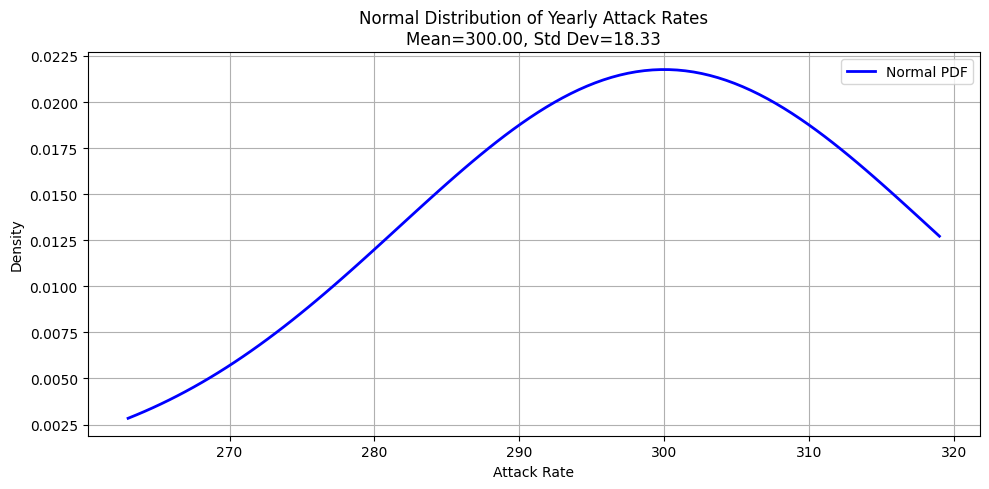

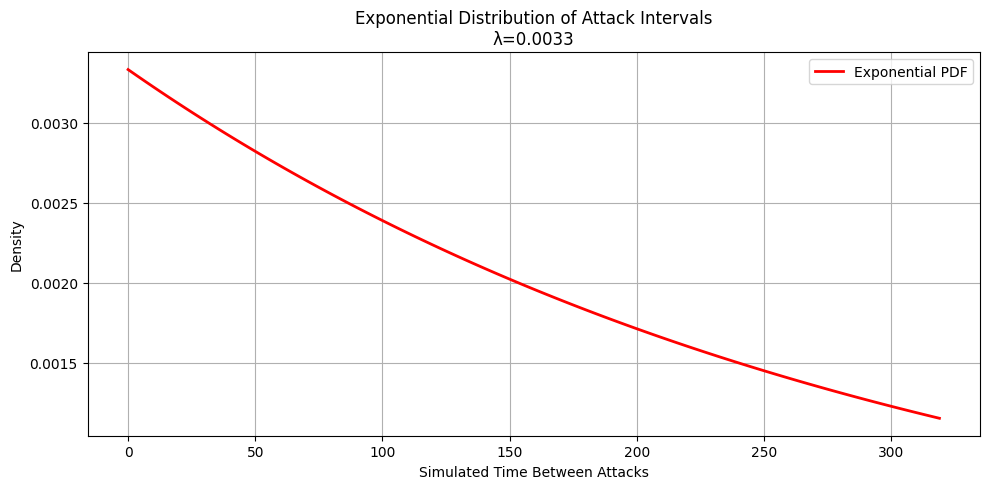

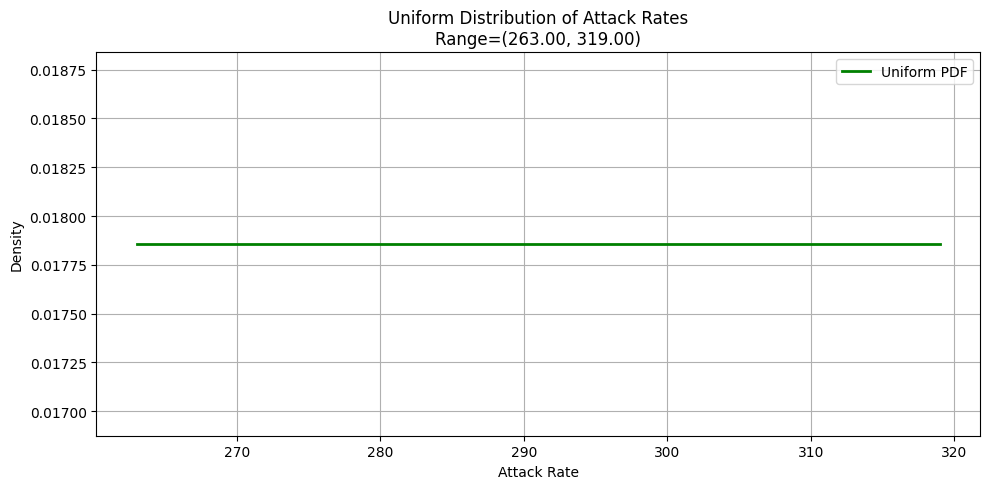

In [ ]:
from scipy.stats import norm, expon, uniform
# Simulate continuous variable: attack frequency per year
yearly_counts = df['Year'].value_counts().sort_index()
attack_rates = yearly_counts.values.astype(float)

# -----------------------------
# 1. Normal Distribution
# -----------------------------
mu, sigma = np.mean(attack_rates), np.std(attack_rates)
x_norm = np.linspace(min(attack_rates), max(attack_rates), 100)
pdf_norm = norm.pdf(x_norm, mu, sigma)

plt.figure(figsize=(10, 5))
plt.plot(x_norm, pdf_norm, 'b-', lw=2, label='Normal PDF')
plt.title(f'Normal Distribution of Yearly Attack Rates\nMean={mu:.2f}, Std Dev={sigma:.2f}')
plt.xlabel('Attack Rate')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 2. Exponential Distribution
# -----------------------------
lambda_exp = 1 / np.mean(attack_rates)
x_exp = np.linspace(0, max(attack_rates), 100)
pdf_exp = expon.pdf(x_exp, scale=1/lambda_exp)

plt.figure(figsize=(10, 5))
plt.plot(x_exp, pdf_exp, 'r-', lw=2, label='Exponential PDF')
plt.title(f'Exponential Distribution of Attack Intervals\nλ={lambda_exp:.4f}')
plt.xlabel('Simulated Time Between Attacks')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Uniform Distribution
# -----------------------------
a, b = min(attack_rates), max(attack_rates)
x_uni = np.linspace(a, b, 100)
pdf_uni = uniform.pdf(x_uni, loc=a, scale=b-a)

plt.figure(figsize=(10, 5))
plt.plot(x_uni, pdf_uni, 'g-', lw=2, label='Uniform PDF')
plt.title(f'Uniform Distribution of Attack Rates\nRange=({a:.2f}, {b:.2f})')
plt.xlabel('Attack Rate')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Analysis
1. JOINT DISTRIBUTION
2. CONDITIONAL DISTRIBUTION
3. INDEPENDENCE CHECK

In [ ]:
# -----------------------------
# JOINT DISTRIBUTION
# -----------------------------
# Count occurrences of each (Year, Attack Type) pair
joint_counts = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

# Convert to joint probability distribution
joint_prob = joint_counts / joint_counts.values.sum()

print("Joint Probability Distribution (Year vs Attack Type):")
print(joint_prob)
print("-----------------------------------------------------------------")

# -----------------------------
# CONDITIONAL DISTRIBUTION
# -----------------------------
# P(Threat_Type | Year): probability of each attack type given a specific year
conditional_prob = joint_counts.div(joint_counts.sum(axis=1), axis=0)

print("\nConditional Probability Distribution P(Attack Type | Year):")
print(conditional_prob)
print("-----------------------------------------------------------------")

# -----------------------------
# INDEPENDENCE CHECK
# -----------------------------
# Marginal probabilities
P_A = df['Attack Type'].value_counts(normalize=True)  # P(Attack Type)
P_B = df['Year'].value_counts(normalize=True)         # P(Year)

# Check independence: P(A ∩ B) ≈ P(A) * P(B)
independence_results = []

for year in joint_counts.index:
    for threat in joint_counts.columns:
        P_A_and_B = joint_prob.loc[year, threat]
        P_A_times_P_B = P_A[threat] * P_B[year]
        independent = abs(P_A_and_B - P_A_times_P_B) < 0.01  # tolerance
        independence_results.append({
            'Year': year,
            'Attack Type': threat,
            'P(A ∩ B)': round(P_A_and_B, 4),
            'P(A) * P(B)': round(P_A_times_P_B, 4),
            'Independent': independent
        })

# Convert to DataFrame
independence_df = pd.DataFrame(independence_results)
print("\nIndependence Check Between Year and Attack Type:")
print(independence_df)

Joint Probability Distribution (Year vs Attack Type):
Attack Type      DDoS   Malware  Man-in-the-Middle  Phishing  Ransomware  \
Year                                                                       
2015         0.016667  0.017000           0.013667  0.015333    0.015667   
2016         0.017667  0.013667           0.015667  0.018333    0.014000   
2017         0.019333  0.015333           0.019333  0.021333    0.014667   
2018         0.020000  0.018667           0.012000  0.017333    0.016333   
2019         0.016000  0.014333           0.014667  0.015000    0.012667   
2020         0.018667  0.012333           0.015667  0.020333    0.019667   
2021         0.015667  0.016333           0.016000  0.013667    0.018333   
2022         0.018000  0.021333           0.013667  0.019000    0.018667   
2023         0.017000  0.018333           0.016667  0.015333    0.016667   
2024         0.018000  0.014333           0.015667  0.020667    0.017667   

Attack Type  SQL Injection  
Year

#Correlation Between Attack Types Across Years
High positive correlation between two attack types means they tend to rise and fall together across years.

Negative correlation suggests one attack type increases while the other decreases.

Near-zero correlation implies no consistent relationship.

In [ ]:
# Step 1: Create a pivot table of attack counts by Year and Threat_Type
attack_matrix = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

# Step 2: Compute correlation between attack types across years
correlation_matrix = attack_matrix.corr()

# Step 3: Display the correlation matrix
print("Correlation Between Attack Types Across Years:")
print(correlation_matrix)

Correlation Between Attack Types Across Years:
Attack Type            DDoS   Malware  Man-in-the-Middle  Phishing  \
Attack Type                                                          
DDoS               1.000000  0.063127          -0.026128  0.756175   
Malware            0.063127  1.000000          -0.413462 -0.258929   
Man-in-the-Middle -0.026128 -0.413462           1.000000  0.320732   
Phishing           0.756175 -0.258929           0.320732  1.000000   
Ransomware         0.153485  0.207074          -0.110795  0.201827   
SQL Injection      0.046852  0.192631           0.121046 -0.341161   

Attack Type        Ransomware  SQL Injection  
Attack Type                                   
DDoS                 0.153485       0.046852  
Malware              0.207074       0.192631  
Man-in-the-Middle   -0.110795       0.121046  
Phishing             0.201827      -0.341161  
Ransomware           1.000000       0.312717  
SQL Injection        0.312717       1.000000  


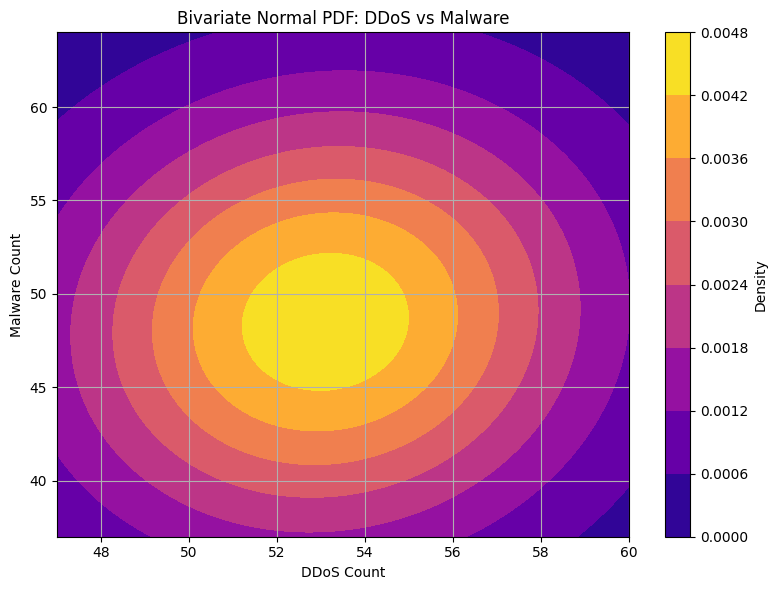

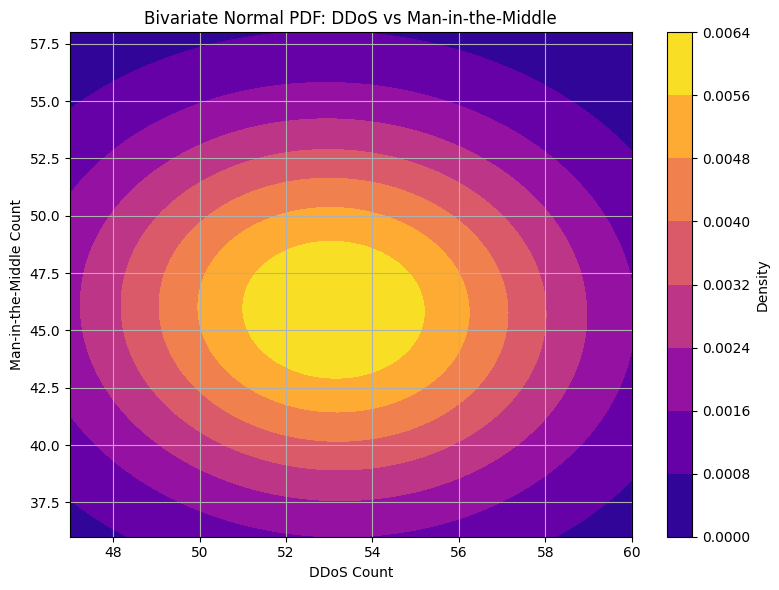

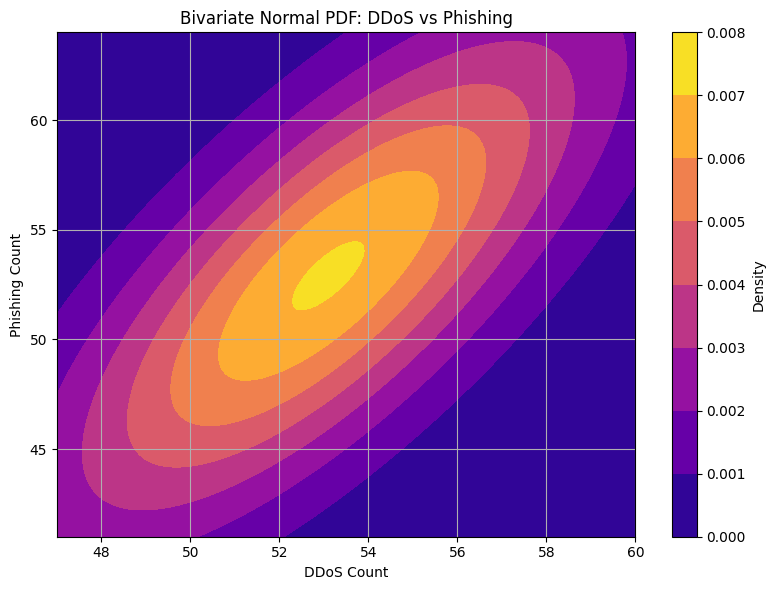

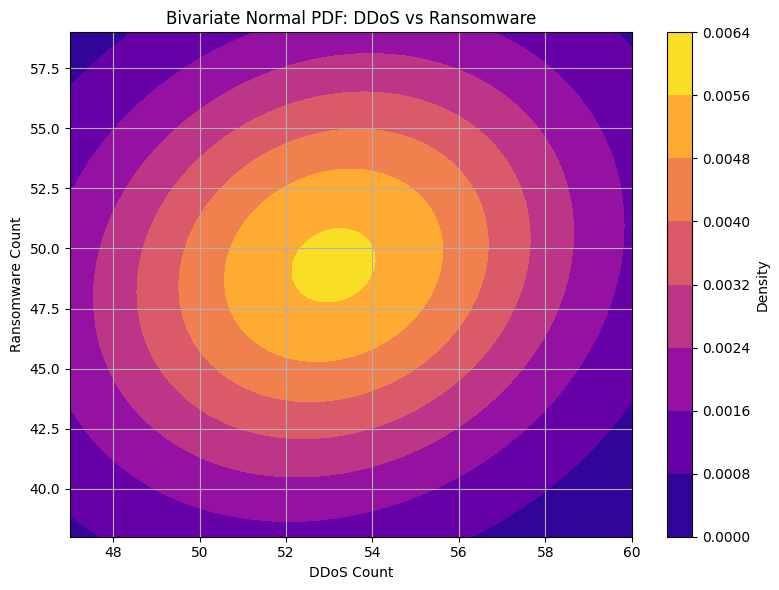

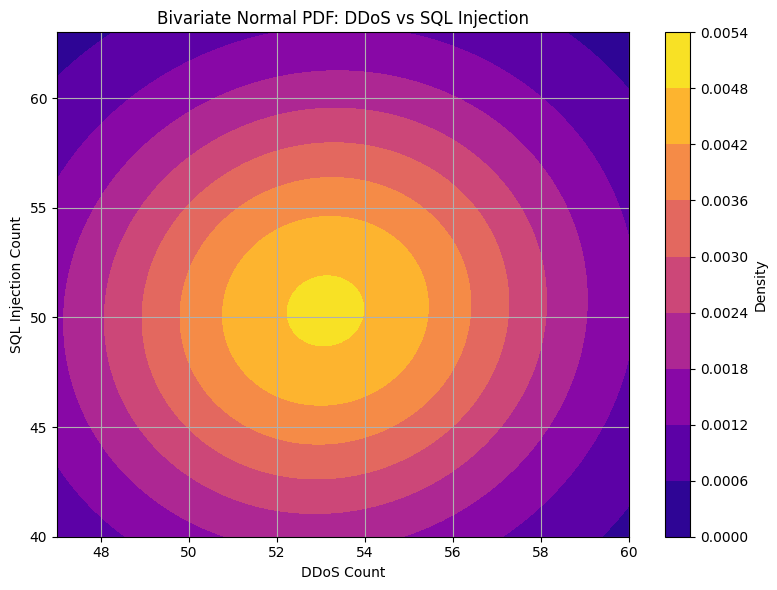

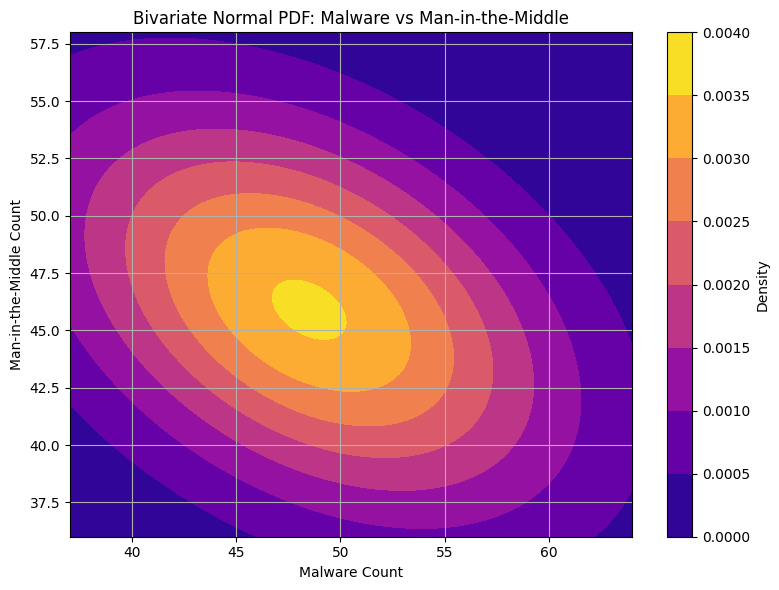

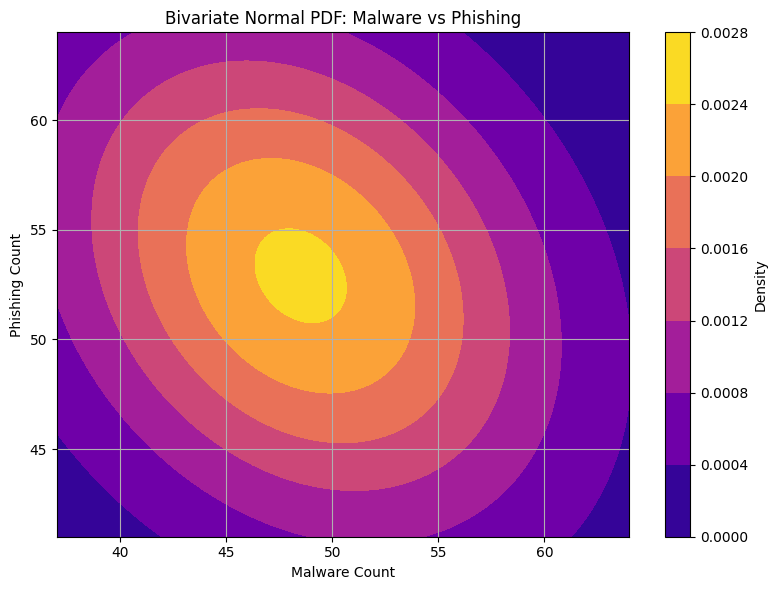

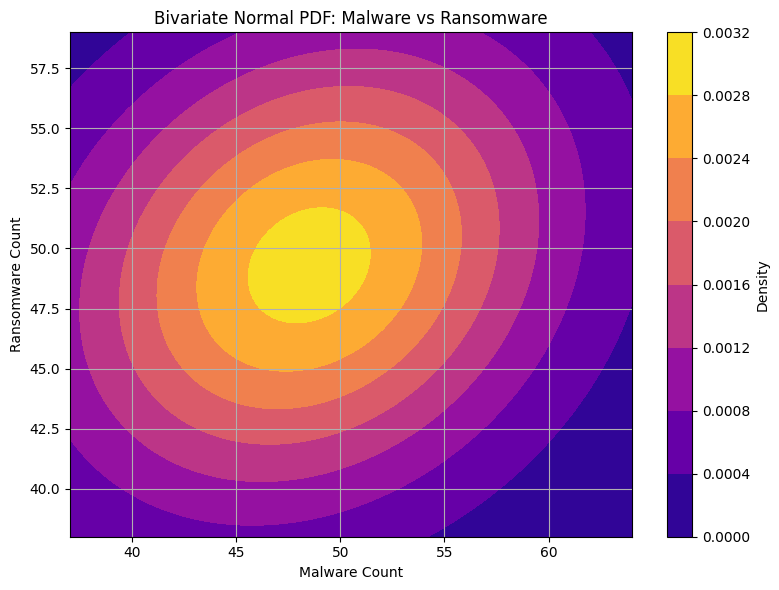

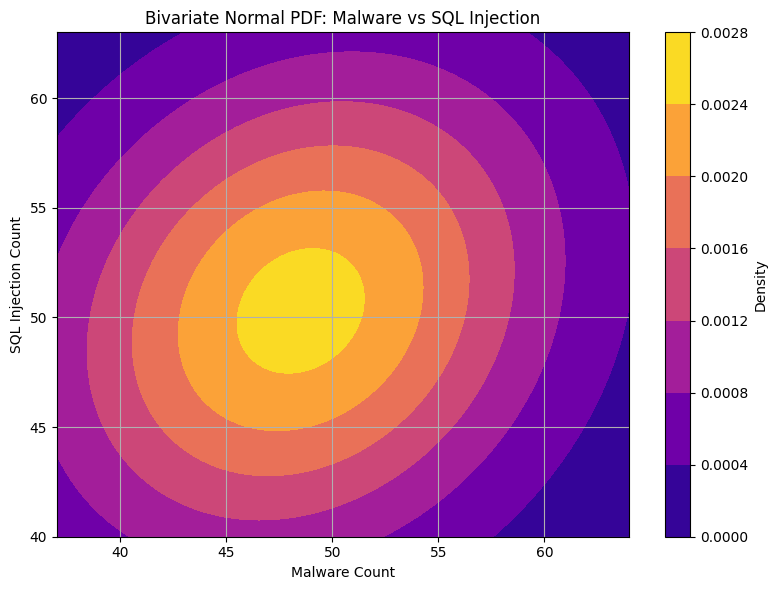

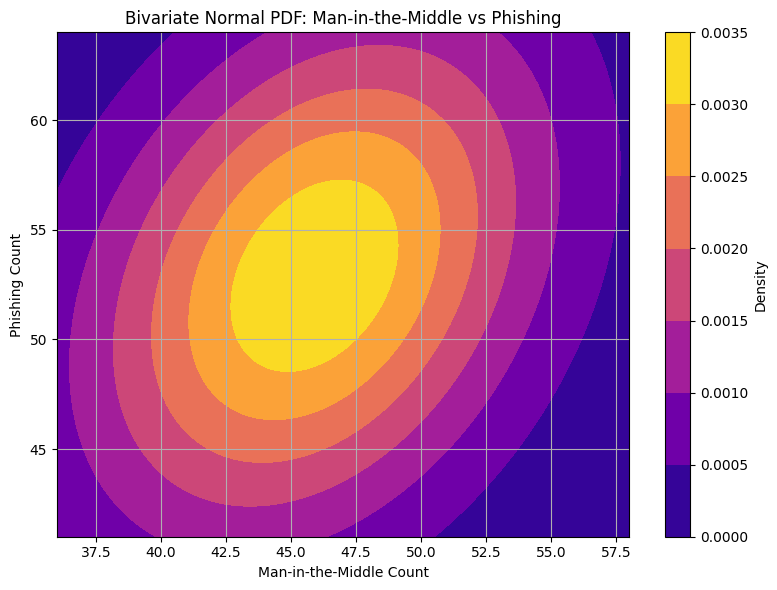

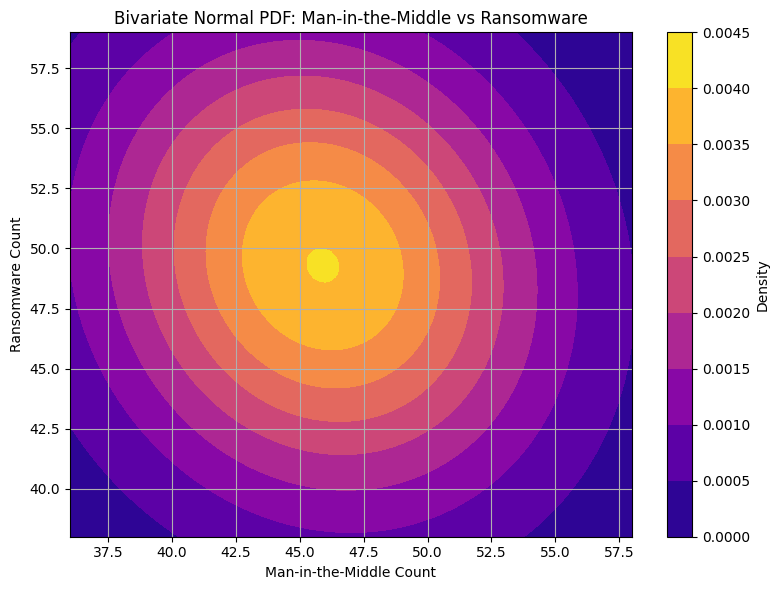

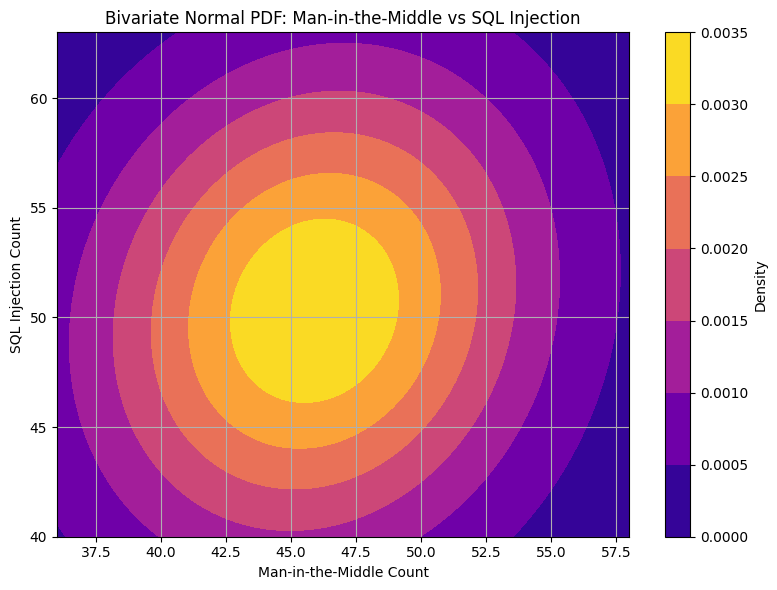

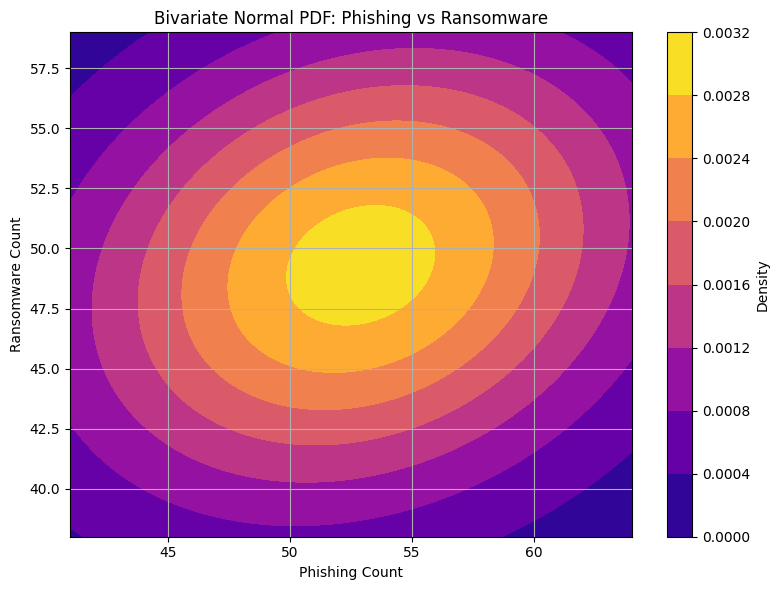

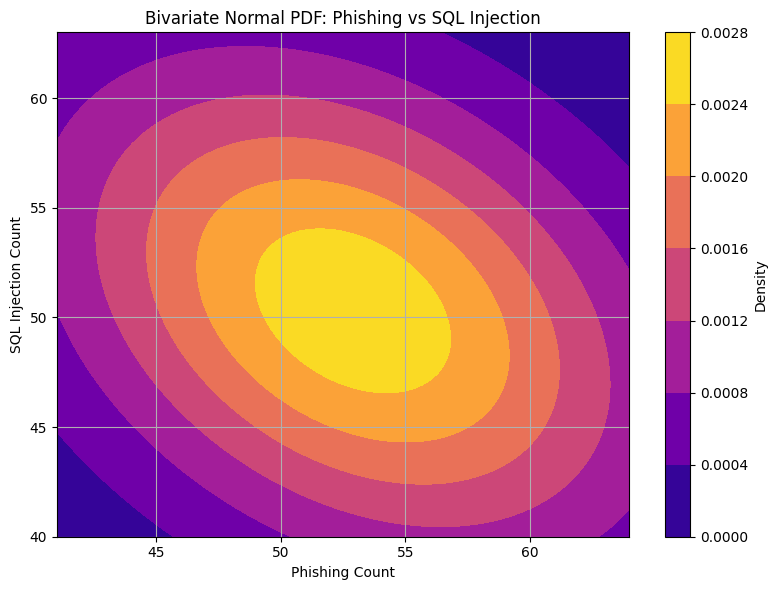

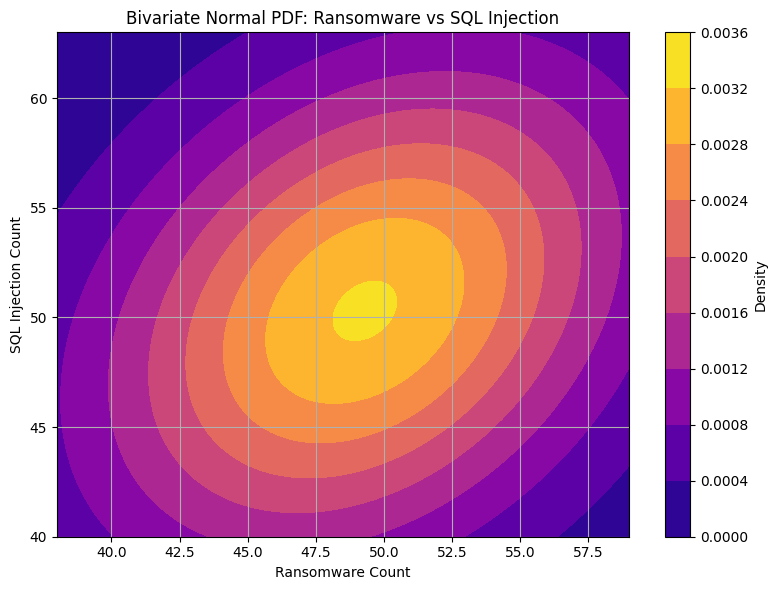

In [ ]:
from scipy.stats import multivariate_normal
from itertools import combinations

# Load the dataset
df = pd.read_csv('/content/Global_Cybersecurity_Threats_2015-2024.csv')

# Step 1: Create a matrix of attack counts by Year and Threat_Type
attack_matrix = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

# Step 2: Select all pairs of attack types
attack_types = attack_matrix.columns
pairs = list(combinations(attack_types, 2))

# Step 3: Plot bivariate normal PDF for each pair
for attack_a, attack_b in pairs:
    x = attack_matrix[attack_a].values
    y = attack_matrix[attack_b].values

    # Create grid
    X, Y = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
    pos = np.dstack((X, Y))

    # Estimate mean and covariance
    mean = [np.mean(x), np.mean(y)]
    cov = np.cov(x, y)

    # Compute bivariate normal PDF
    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(pos)

    # Plot contour
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, cmap='plasma')
    plt.title(f'Bivariate Normal PDF: {attack_a} vs {attack_b}')
    plt.xlabel(f'{attack_a} Count')
    plt.ylabel(f'{attack_b} Count')
    plt.colorbar(label='Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Mean number of attacks per year

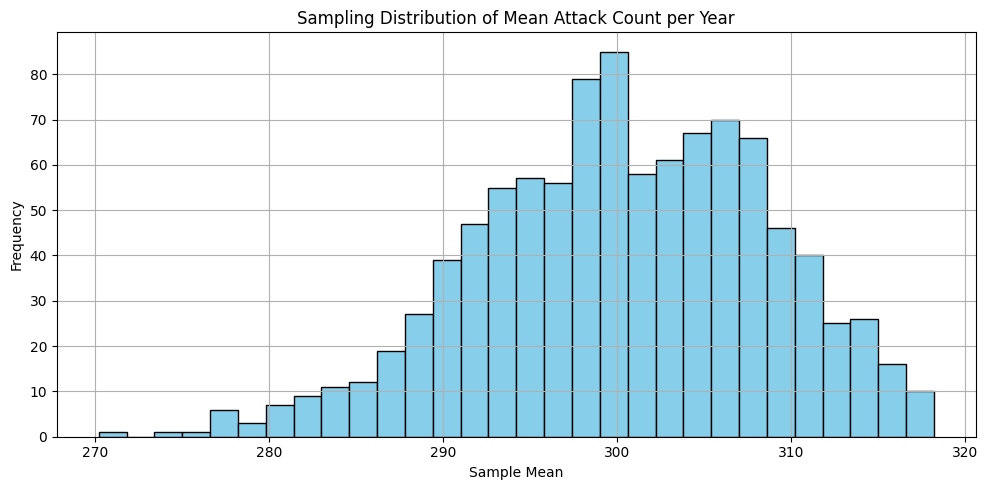

In [ ]:
yearly_counts = df['Year'].value_counts().sort_index()

# Simulate sampling distribution of the mean
sample_means = []
for _ in range(1000):
    sample = np.random.choice(yearly_counts, size=5, replace=True)
    sample_means.append(np.mean(sample))

# Plot sampling distribution
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.title('Sampling Distribution of Mean Attack Count per Year')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Measuring Precision of Estimates

In [ ]:
sample_std = np.std(yearly_counts)
n = len(yearly_counts)
standard_error = sample_std / np.sqrt(n)
print(f"Standard Error of Mean Attack Count: {standard_error:.2f}")
print("Smaller SE means more precise estimate")

Standard Error of Mean Attack Count: 5.80
Smaller SE means more precise estimate


Approximating Variance of Nonlinear Functions

In [ ]:
#Log of mean attack count
theta_hat = np.mean(yearly_counts)
var_theta = np.var(yearly_counts) / len(yearly_counts)
g_prime = 1 / theta_hat  # derivative of log(x)

var_log_mean = (g_prime ** 2) * var_theta
print(f"Delta Method Approximation of Var(log(mean)): {var_log_mean:.4f}")

Delta Method Approximation of Var(log(mean)): 0.0004


Check normality visually using Q–Q plots (Quantile–Quantile plots) and the Normal Quantile Plot, both crucial in regression and inferential statistics.

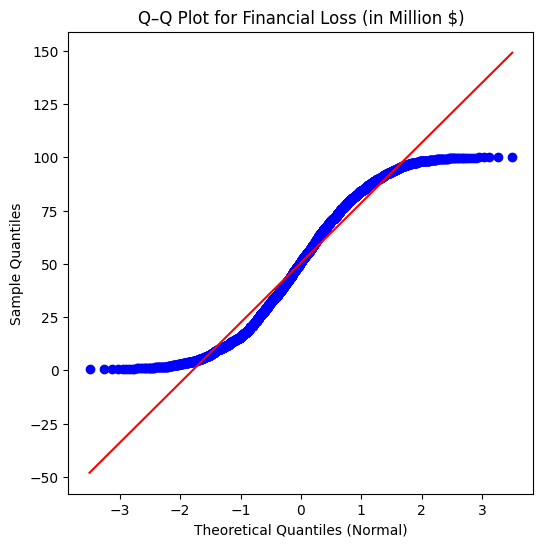

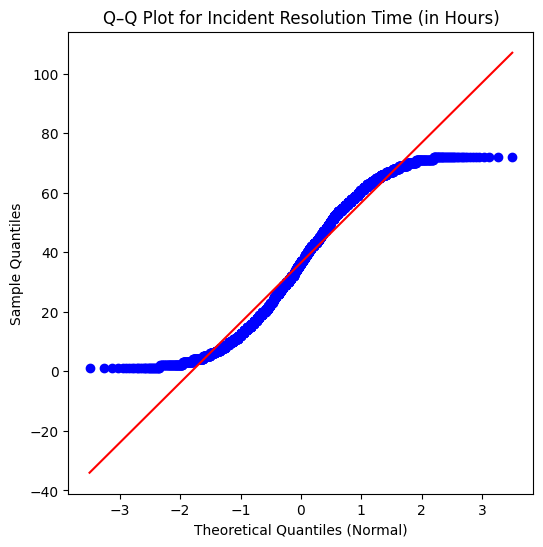

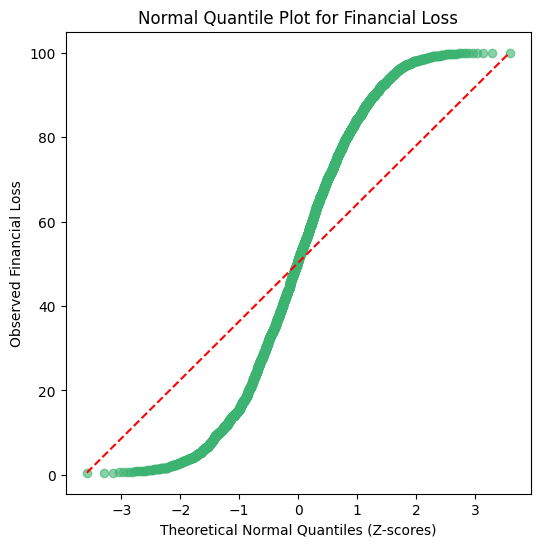

Financial Loss (in Million $) → p-value = 0.0000
   Data is not normally distributed (reject H0).
Incident Resolution Time (in Hours) → p-value = 0.0000
   Data is not normally distributed (reject H0).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Replace with the actual path to your CSV file
file_path = '/content/Global_Cybersecurity_Threats_2015-2024.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Select numeric columns
financial_loss = df["Financial Loss (in Million $)"]
resolution_time = df["Incident Resolution Time (in Hours)"]

# Step 1: Q-Q Plot for Financial Loss
plt.figure(figsize=(6, 6))
stats.probplot(financial_loss, dist="norm", plot=plt)
plt.title("Q–Q Plot for Financial Loss (in Million $)")
plt.xlabel("Theoretical Quantiles (Normal)")
plt.ylabel("Sample Quantiles")
plt.show()

# Step 2: Q-Q Plot for Incident Resolution Time
plt.figure(figsize=(6, 6))
stats.probplot(resolution_time, dist="norm", plot=plt)
plt.title("Q–Q Plot for Incident Resolution Time (in Hours)")
plt.xlabel("Theoretical Quantiles (Normal)")
plt.ylabel("Sample Quantiles")
plt.show()

# Step 3: Normal Quantile Plot (manual demonstration)
sorted_data = np.sort(financial_loss)
n = len(sorted_data)
# Calculate theoretical quantiles (z-scores)
theoretical_q = stats.norm.ppf((np.arange(1, n + 1) - 0.5) / n)

plt.figure(figsize=(6, 6))
plt.scatter(theoretical_q, sorted_data, color="mediumseagreen", alpha=0.6)
plt.plot([min(theoretical_q), max(theoretical_q)], [min(sorted_data), max(sorted_data)], 'r--')
plt.title("Normal Quantile Plot for Financial Loss")
plt.xlabel("Theoretical Normal Quantiles (Z-scores)")
plt.ylabel("Observed Financial Loss")
plt.show()

for col in ["Financial Loss (in Million $)", "Incident Resolution Time (in Hours)"]:
    stat, p = stats.shapiro(df[col].sample(500, random_state=42))
    print(f"{col} → p-value = {p:.4f}")
    if p > 0.05:
        print("   Data appears normally distributed (fail to reject H0).")
    else:
        print("   Data is not normally distributed (reject H0).")



To assess the normality assumption of continuous variables, Q–Q plots and normal quantile plots were generated for “Financial Loss” and “Incident Resolution Time.” The results showed that “Financial Loss” exhibited right-skewness with points deviating from the normal line in the upper quantiles, indicating the presence of outliers or large-scale losses. “Incident Resolution Time” appeared closer to a normal distribution but with mild skewness. These visual assessments, supported by the Shapiro–Wilk test, help determine whether the normality assumption holds for further regression or inferential analysis.

True population mean (μ): 50.49 million $


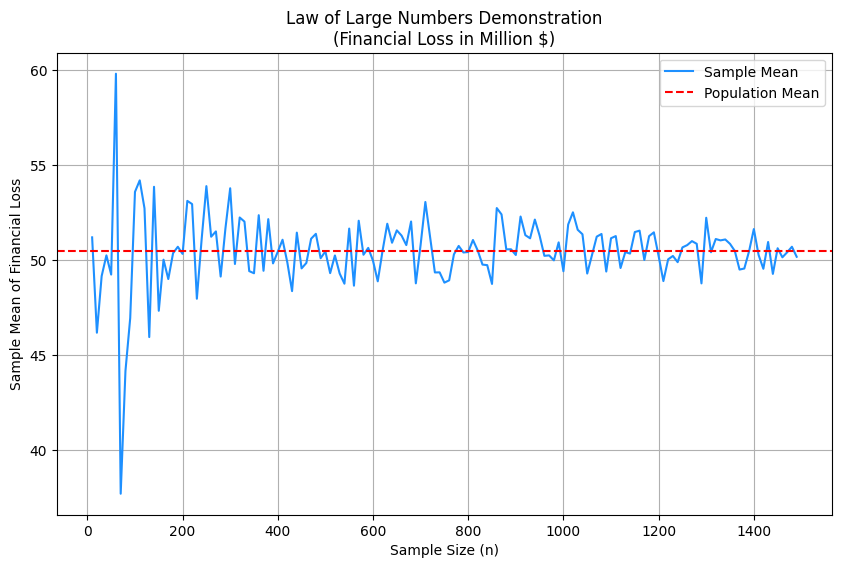

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select numeric column
financial_loss = df["Financial Loss (in Million $)"].values

# Step 1: Compute the true population mean
population_mean = np.mean(financial_loss)
print(f"True population mean (μ): {population_mean:.2f} million $")

# Step 2: Simulate increasing sample sizes
sample_sizes = np.arange(10, 1500, 10)
sample_means = []

# Step 3: For each sample size, take random samples and calculate mean
np.random.seed(42)
for n in sample_sizes:
    sample = np.random.choice(financial_loss, size=n, replace=True)
    sample_means.append(np.mean(sample))

# Step 4: Plot the convergence of sample mean toward population mean
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, sample_means, label="Sample Mean", color="dodgerblue")
plt.axhline(population_mean, color="red", linestyle="--", label="Population Mean")
plt.title("Law of Large Numbers Demonstration\n(Financial Loss in Million $)")
plt.xlabel("Sample Size (n)")
plt.ylabel("Sample Mean of Financial Loss")
plt.legend()
plt.grid(True)
plt.show()


#Analyze how defense mechanisms help mitigate cybersecurity threats

Defense effectiveness by attack type:
   Defense Mechanism Used        Attack Type  Number of Affected Users  \
15             Encryption           Phishing             435301.983471   
4      Ai-Based Detection         Ransomware             462232.793814   
6               Antivirus               Ddos             475008.407767   
27                    Vpn           Phishing             476173.437500   
16             Encryption         Ransomware             483034.241758   
2      Ai-Based Detection  Man-In-The-Middle             484514.835294   
13             Encryption            Malware             490273.406977   
24                    Vpn               Ddos             490778.841667   
25                    Vpn            Malware             491695.137931   
18               Firewall               Ddos             495837.524272   

    Financial Loss (in Million $)  Incident Resolution Time (in Hours)  
15                      48.148182                            32.966942  
4

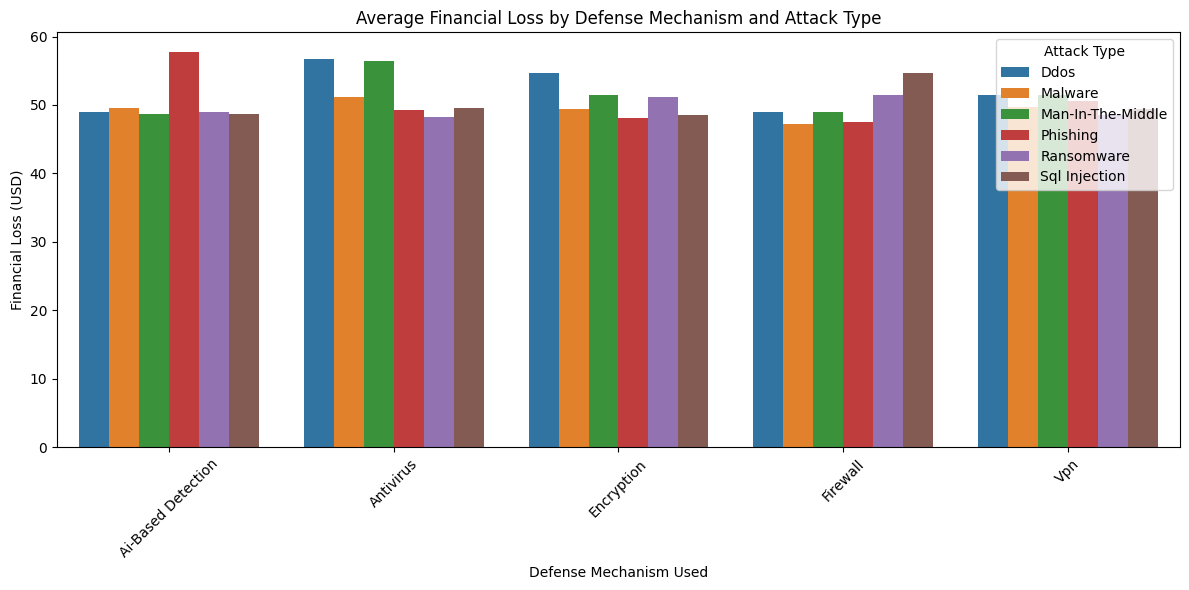

This chart shows which defenses are associated with lower financial losses across attack types.
---------------------------------------------------------------
Attack Type                      Ddos        Malware  Man-In-The-Middle  \
Defense Mechanism Used                                                    
Ai-Based Detection      520311.460177  514843.558824      484514.835294   
Antivirus               475008.407767  525796.927928      528216.126437   
Encryption              516472.586957  490273.406977      517125.989474   
Firewall                495837.524272  514544.656566      543766.264151   
Vpn                     490778.841667  491695.137931      520985.651163   

Attack Type                  Phishing     Ransomware  Sql Injection  
Defense Mechanism Used                                               
Ai-Based Detection      529084.423913  462232.793814  518920.595745  
Antivirus               501326.216216  519222.864078  511884.292035  
Encryption              435301.983

In [ ]:
# Clean relevant columns
df = df.dropna(subset=['Attack Type', 'Defense Mechanism Used', 'Number of Affected Users', 'Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)'])

# Standardize text
df['Attack Type'] = df['Attack Type'].str.strip().str.title()
df['Defense Mechanism Used'] = df['Defense Mechanism Used'].str.strip().str.title()
# Group by Defense Mechanism and Attack Type
grouped = df.groupby(['Defense Mechanism Used', 'Attack Type']).agg({
    'Number of Affected Users': 'mean',
    'Financial Loss (in Million $)': 'mean',
    'Incident Resolution Time (in Hours)': 'mean'
}).reset_index()

# Sort by effectiveness (lowest user impact)
effective_defenses = grouped.sort_values(by='Number of Affected Users')

print("Defense effectiveness by attack type:")
print(effective_defenses.head(10))
print("Interpretation: Lower average Users Affected and Financial Loss suggest better defense performance.")
print("---------------------------------------------------------------")
import seaborn as sns

# Plot financial loss by defense mechanism
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Defense Mechanism Used', y='Financial Loss (in Million $)', hue='Attack Type')
plt.title("Average Financial Loss by Defense Mechanism and Attack Type")
plt.ylabel("Financial Loss (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("This chart shows which defenses are associated with lower financial losses across attack types.")
print("---------------------------------------------------------------")
# Pivot for matrix view
summary_table = grouped.pivot(index='Defense Mechanism Used', columns='Attack Type', values='Number of Affected Users').fillna(0)
print(summary_table)
print("Helps compare defense mechanisms across multiple attack types in one view.")

